In [1]:
library(ggplot2)
library(stringr)
library(ggsci)
library(ggpubr)
library(reshape2)
library(corrplot)
library(dplyr)
library(tidyverse)
library(EnvStats)
library(ggpmisc)

setwd("D:/Silence/P_07_T20_vs_T7/gemomics/upload_to_github/") #change the path to the data directory
colors = pal_npg("nrc", alpha =1)(2)

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
corrplot 0.92 loaded


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'EnvStats' was built under R version 4.3.3"

Attaching package: 'EnvStats'


The following obj

# Figure 2

In [2]:
data <- read.table(file="Figure2_total.Q20.Q30.txt", header=T)
data$Q20 <- (data$Raw_read1_Q20 + data$Raw_read2_Q20) / 2
data$Q30 <- (data$Raw_read1_Q30 + data$Raw_read2_Q30) / 2
mean(data[data$Platform=="T7",]$Q20)
confint(lm(Q20 ~ 1, data[data$Platform=="T7",]), level=0.95)
mean(data[data$Platform=="T7",]$Q30)
confint(lm(Q30 ~ 1, data[data$Platform=="T7",]), level=0.95)
mean(data[data$Platform=="T20",]$Q20)
confint(lm(Q20 ~ 1, data[data$Platform=="T20",]), level=0.95)
mean(data[data$Platform=="T20",]$Q30)
confint(lm(Q30 ~ 1, data[data$Platform=="T20",]), level=0.95)
confint(lm(Raw_read1_Q30 ~ 1, data[data$Platform=="T20",]), level=0.95)
confint(lm(Raw_read2_Q30 ~ 1, data[data$Platform=="T20",]), level=0.95)
#figure2
data1 <- data[data$Cohorts=="Gut180",]
data2 <- data[data$Cohorts=="Oral190",]
data3 <- data[data$Cohorts=="WGS75",]
data4 <- data[data$Cohorts=="Gut62",]

mean(data1[data1$Platform=="T20",]$Q20)
mean(data1[data1$Platform=="T7",]$Q20)
mean(data1[data1$Platform=="T20",]$Q30)
mean(data1[data1$Platform=="T7",]$Q30)

mean(data2[data2$Platform=="T20",]$Q20)
mean(data2[data2$Platform=="T7",]$Q20)
mean(data2[data2$Platform=="T20",]$Q30)
mean(data2[data2$Platform=="T7",]$Q30)

mean(data3[data3$Platform=="T20",]$Q20)
mean(data3[data3$Platform=="T7",]$Q20)
mean(data3[data3$Platform=="T20",]$Q30)
mean(data3[data3$Platform=="T7",]$Q30)

mean(data4[data4$Platform=="T7_Lib2",]$Q20)
mean(data4[data4$Platform=="T7_Lib1",]$Q20)
mean(data4[data4$Platform=="T7_Lib2",]$Q30)
mean(data4[data4$Platform=="T7_Lib1",]$Q30)

[1] 97.87076

,2.5 %,97.5 %
(Intercept),97.80674,97.93479


[1] 93.43243

,2.5 %,97.5 %
(Intercept),93.26069,93.60416


[1] 95.7974

,2.5 %,97.5 %
(Intercept),95.76302,95.83179


[1] 87.32511

,2.5 %,97.5 %
(Intercept),87.24963,87.40059


,2.5 %,97.5 %
(Intercept),88.73425,88.8621


,2.5 %,97.5 %
(Intercept),85.71467,85.98942


[1] 95.99989

[1] 98.08394

[1] 87.70578

[1] 93.82872

[1] 95.74426

[1] 98.13455

[1] 87.3475

[1] 94.40421

[1] 95.44607

[1] 96.69087

[1] 86.3548

[1] 90.01947

[1] 97.56806

[1] 98.30129

[1] 92.94573

[1] 94.32048

## Supplementary Figure3

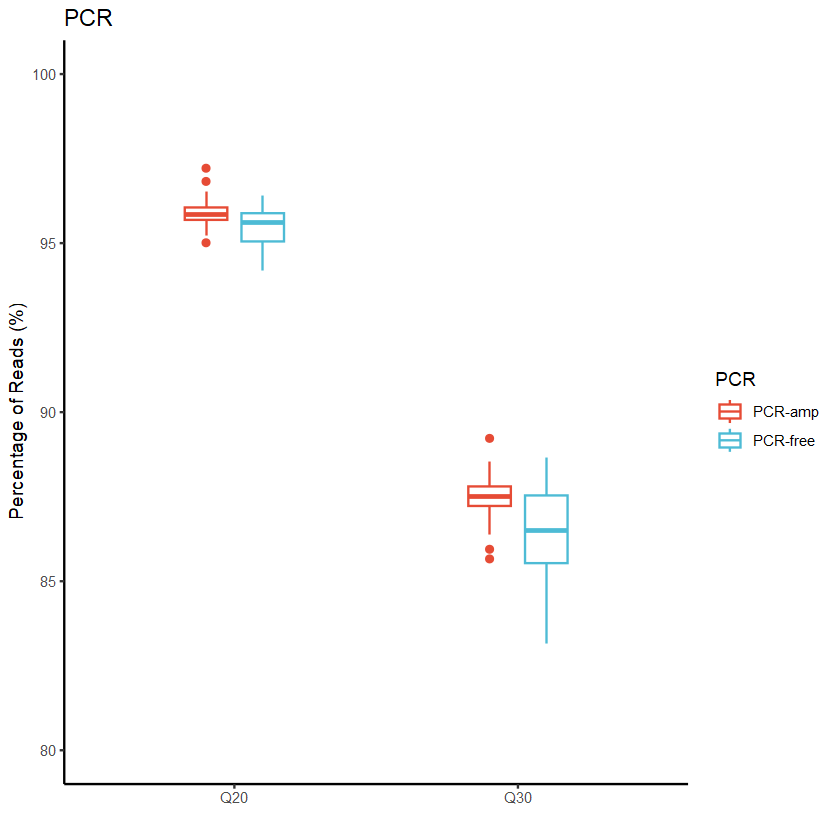

In [3]:
#Supplementary Figure3
#pcr-free(wgs) vs pcr-amplication (gut180+oral190)
data1 <- data[data$Cohorts=="Gut180"|data$Cohorts=="Oral190",]
data2 <- data[data$Cohorts=="WGS75",]
data1$Cohorts <- "PCR-amp"
data2$Cohorts <- "PCR-free"
pdata <- rbind(data1[data1$Platform=="T20",], data2[data2$Platform=="T20",])

ppdata <- melt(pdata, id=c("Samle","Cohorts"), measure.vars=c("Q20","Q30"))
colnames(ppdata) <- c("Sample","PCR","quality","score")
#pdf(file="PCR-free.base.quality.pdf",height=5,width=10)
ggplot() + geom_boxplot(data=ppdata, mapping=aes(x=as.factor(quality), y=score, color=PCR), width=0.3, position=position_dodge(width=0.4)) + ggtitle("PCR") +  scale_color_manual(values=colors) + xlab("") + ylab("Percentage of Reads (%)") + theme_classic() + coord_cartesian(ylim=c(80,100))
#dev.off()

## Figure 2d

,2.5 %,97.5 %
(Intercept),87.47972,87.56388


,2.5 %,97.5 %
(Intercept),86.03387,86.67573


,2.5 %,97.5 %
(Intercept),95.84121,95.89603


,2.5 %,97.5 %
(Intercept),95.31827,95.57387


[1] 0.8831287

,2.5 %,97.5 %
(Intercept),0.8815518,0.8847055


[1] 0.7594952

,2.5 %,97.5 %
(Intercept),0.7582056,0.7607849


Using id, group as id variables

`summarise()` has grouped output by 'Rgroup'. You can override using the `.groups` argument.


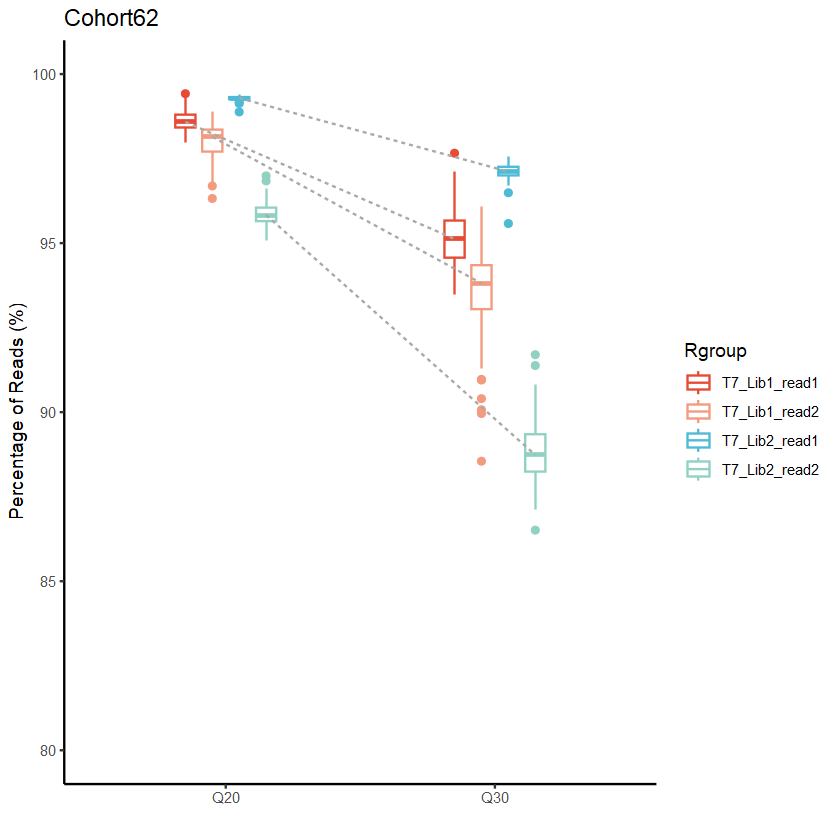

In [4]:
confint(lm(Q30 ~ 1, data1[data1$Platform=="T20",]), level=0.95)
confint(lm(Q30 ~ 1, data2[data2$Platform=="T20",]), level=0.95)
confint(lm(Q20 ~ 1, data1[data1$Platform=="T20",]), level=0.95)
confint(lm(Q20 ~ 1, data2[data2$Platform=="T20",]), level=0.95)

color4 = c("#E64B35FF","#F39B7FFF","#4DBBD5FF","#91D1C2FF")
qdata1 <- read.table("Figure2d_Meta.Q20.Q30.summary.txt",header=T)
qdata3 <- read.table("Figure2d_Meta.Library.Q20.Q30.summary.txt",header=T)
mean(qdata1[qdata1$Platform=="T7",]$Q30ofLast50Read2)
confint(lm(Q30ofLast50Read2 ~ 1, qdata1[qdata1$Platform=="T7",]), level=0.95)
mean(qdata1[qdata1$Platform=="T20",]$Q30ofLast50Read2)
confint(lm(Q30ofLast50Read2 ~ 1, qdata1[qdata1$Platform=="T20",]), level=0.95)
##only keep raw Q20/Q30 result
qcdata3 <- qdata3[,c("ID","Platform","Raw_read1_Q20","Raw_read2_Q20","Raw_read1_Q30","Raw_read2_Q30")]
colnames(qcdata3) <- c("id","group","Q20_read1","Q20_read2","Q30_read1","Q30_read2")
ttdata3 <- melt(qcdata3)
qcdata1 <- qdata1[qdata1$Group!="Gut",c("ID","Platform","Raw_read1_Q20","Raw_read2_Q20","Raw_read1_Q30","Raw_read2_Q30")]
qcdata2 <- qdata1[qdata1$Group=="Gut",c("ID","Platform","Raw_read1_Q20","Raw_read2_Q20","Raw_read1_Q30","Raw_read2_Q30")]
ttdata1 <- melt(qcdata1, id=c("ID","Platform"))
ttdata2 <- melt(qcdata2, id=c("ID","Platform"))

ttdata3$quality <- str_split_fixed(ttdata3$variable,"_",2)[,1]
ttdata3$c2 <- str_split_fixed(ttdata3$variable,"_",2)[,2]
ttdata3$Rgroup <- paste(ttdata3$group, ttdata3$c2, sep="_")
ttdata3 <- ttdata3[,c("id","quality","Rgroup","value")]
tdata3sum <- ttdata3 %>%
  group_by(Rgroup,quality) %>%
  summarise(Median = median(value)) %>%
  ungroup()

#pdf(file="Meta.Library.T7.Q20.Q30.pdf",height=4,width=6)
ggplot() + geom_boxplot(data=ttdata3, mapping=aes(x=as.factor(quality), y=value, color=Rgroup), width=0.3, position=position_dodge(width=0.4)) + geom_line(data=tdata3sum, mapping=aes(x=as.factor(quality), y=Median, group=Rgroup), color="darkgrey", position=position_dodge(width=0.4), linewidth=0.5, linetype=2) + ggtitle("Cohort62") +  scale_color_manual(values=color4) + xlab("") + ylab("Percentage of Reads (%)") + theme_classic() + coord_cartesian(ylim=c(80,100))
#dev.off()

## Figure 2a

`summarise()` has grouped output by 'Rgroup'. You can override using the `.groups` argument.


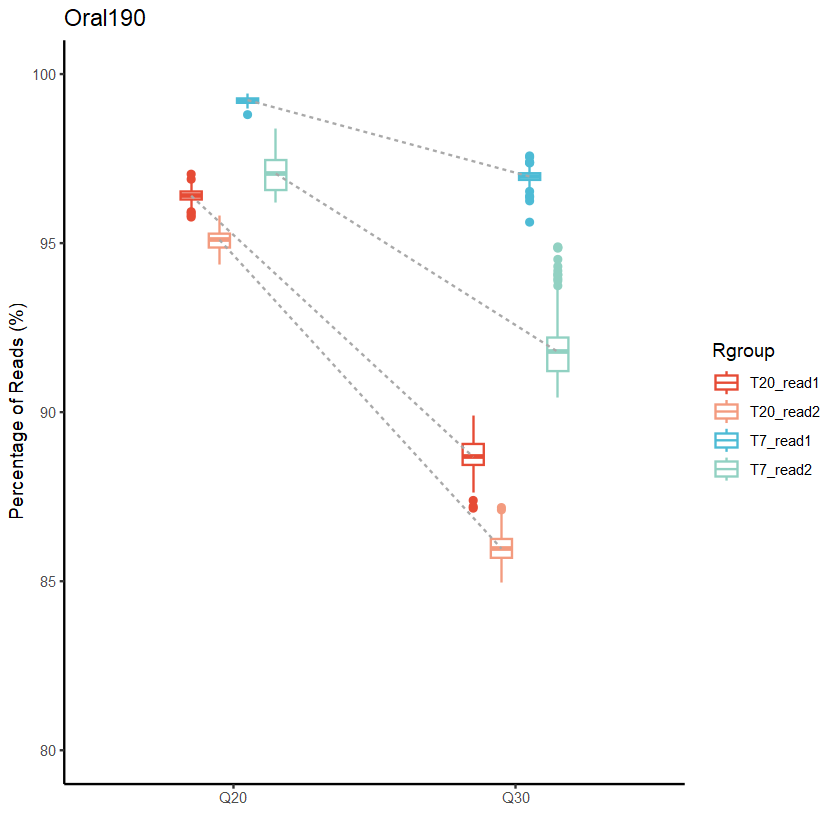

In [5]:
ttdata1$quality <- str_split_fixed(ttdata1$variable,"_",3)[,3]
ttdata1$c2 <- str_split_fixed(ttdata1$variable,"_",3)[,2]
ttdata1$Rgroup <- paste(ttdata1$Platform, ttdata1$c2, sep="_")
ttdata1 <- ttdata1[,c("ID","quality","Rgroup","value")]
tdata1sum <- ttdata1 %>%
  group_by(Rgroup,quality) %>%
  summarise(Median = median(value)) %>%
  ungroup()

#pdf(file="Meta.Oral.T7.Q20.Q30.pdf",height=4,width=6)
ggplot() + geom_boxplot(data=ttdata1, mapping=aes(x=as.factor(quality), y=value, color=Rgroup), width=0.3, position=position_dodge(width=0.4)) + geom_line(data=tdata1sum, mapping=aes(x=as.factor(quality), y=Median, group=Rgroup), color="darkgrey", position=position_dodge(width=0.4), linewidth=0.5, linetype=2) + ggtitle("Oral190") +  scale_color_manual(values=color4) + xlab("") + ylab("Percentage of Reads (%)") + theme_classic() + coord_cartesian(ylim=c(80,100))
#dev.off()

## Figure 2b

`summarise()` has grouped output by 'Rgroup'. You can override using the `.groups` argument.


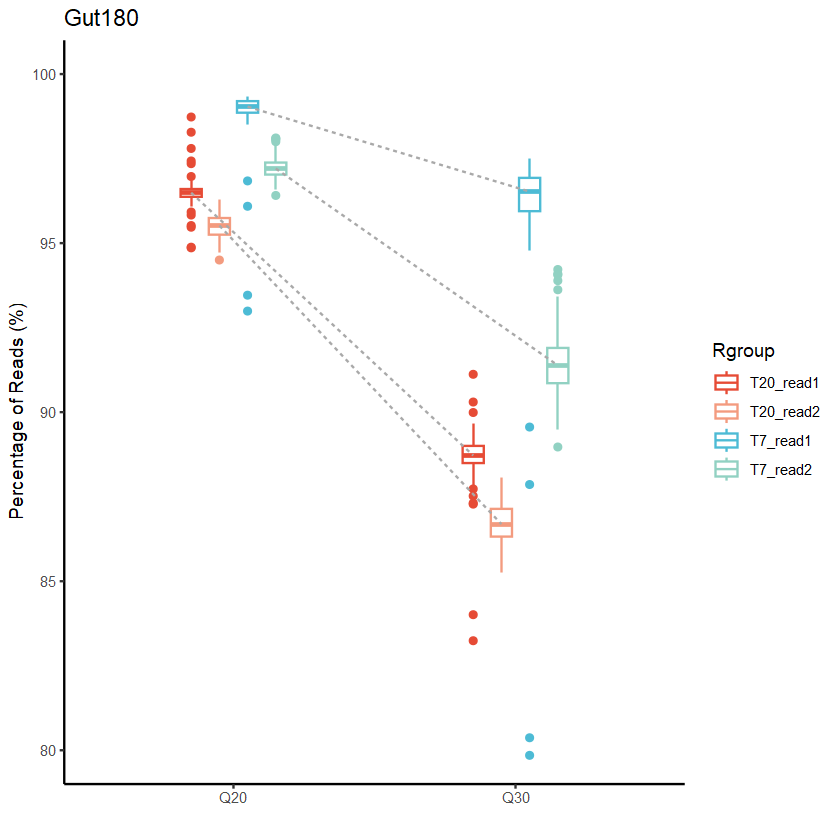

In [6]:
ttdata2$quality <- str_split_fixed(ttdata2$variable,"_",3)[,3]
ttdata2$c2 <- str_split_fixed(ttdata2$variable,"_",3)[,2]
ttdata2$Rgroup <- paste(ttdata2$Platform, ttdata2$c2, sep="_")
ttdata2 <- ttdata2[,c("ID","quality","Rgroup","value")]
tdata2sum <- ttdata2 %>%
  group_by(Rgroup,quality) %>%
  summarise(Median = median(value)) %>%
  ungroup()

#pdf(file="Meta.Gut.T7.Q20.Q30.pdf",height=4,width=6)
ggplot() + geom_boxplot(data=ttdata2, mapping=aes(x=as.factor(quality), y=value, color=Rgroup), width=0.3, position=position_dodge(width=0.4)) + geom_line(data=tdata2sum, mapping=aes(x=as.factor(quality), y=Median, group=Rgroup), color="darkgrey", position=position_dodge(width=0.4), linewidth=0.5, linetype=2) + ggtitle("Gut180") +  scale_color_manual(values=color4) + xlab("") + ylab("Percentage of Reads (%)") + theme_classic() + coord_cartesian(ylim=c(80,100))
#dev.off()

# Figure 3

## Figure 3a

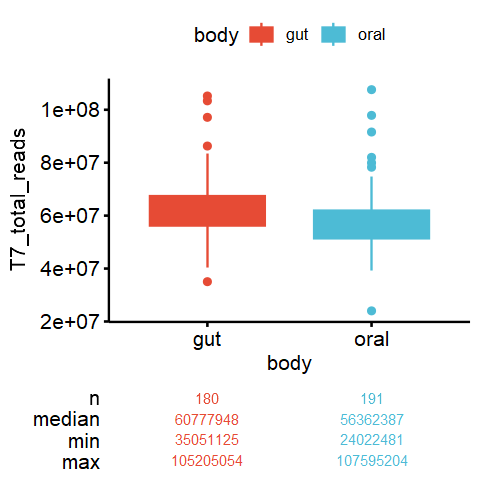

In [7]:
#Figure 3a
options(repr.plot.width = 4, repr.plot.height = 4)

p3 = read.csv("Figure3ac_human_Reads_contamination.txt", sep = "\t", row.names = "X") %>% 
ggsummarystats(x="body",y="T7_total_reads",fill="body",palette = "npg",color="body",summaries = c("n", "median", "min","max"))

p3

## Figure 3b

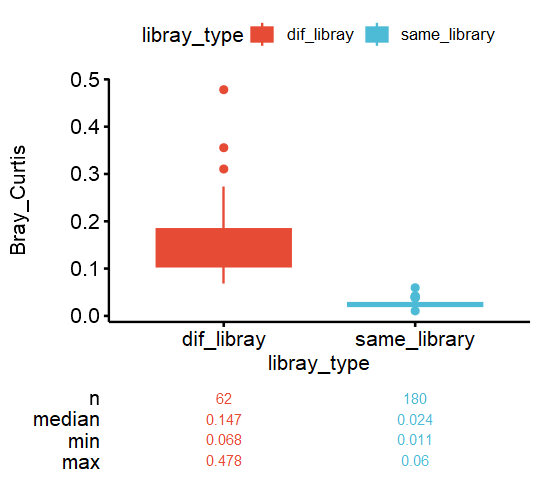

In [8]:
#Figure 3b
options(repr.plot.width = 4.5, repr.plot.height = 4)

p4 = read.csv("Figure3b_gut_samples_comparions.txt",sep="\t") %>% filter(libray_type != "cohort_16_same_library") %>%
ggsummarystats(x="libray_type",y="Bray_Curtis",fill="libray_type",palette = "npg",color="libray_type",digits = 3,
              order = c("dif_libray","same_library"),summaries = c("n", "median", "min","max"))

p4
#ggsave("Figure2c.pdf",width = 4.5,height = 4)

#pdf("Figure2c.pdf",width = 4.5,height = 4)
#p4
#dev.off()

## Figure 3c

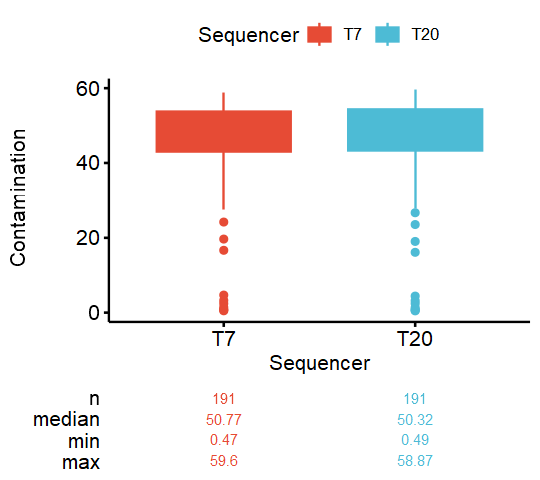

In [9]:
# Figure 3c
p5 = read.csv("Figure3ac_human_Reads_contamination.txt", sep = "\t", row.names = "X") %>%
    filter(body == "oral") %>%
    pivot_longer(!body, names_to = "Sequencer", values_to = "Contamination") %>%
    filter(Sequencer == "T7" | Sequencer == "T20") %>%
    ggsummarystats(x = "Sequencer", y = "Contamination", fill = "Sequencer", palette = "npg",digits = 2,
        color = "Sequencer", summaries = c("n", "median", "min", "max"))

#pdf("Figure2d.pdf",width = 4,height = 4)
p5
#dev.off()

## Figure 3d

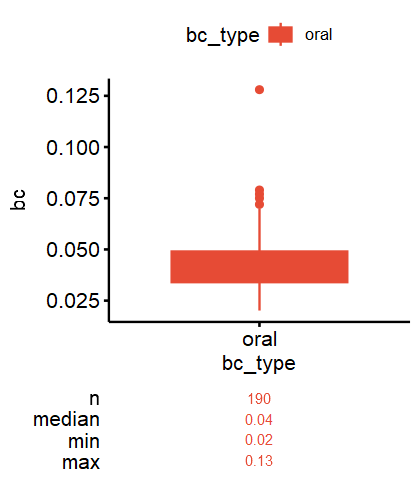

In [10]:
#Figure 3d
options(repr.plot.width = 3.5, repr.plot.height = 4)

p6 = read.csv("Figure3d_salivery_samples_comparions.txt", sep = "\t") %>%
    mutate(bc_type = "oral") %>%
    ggsummarystats(x = "bc_type", y = "bc", fill = "bc_type", palette = "npg", digits = 2,
        color = "bc_type", summaries = c("n", "median", "min", "max"))

#pdf("Figure2e.pdf",width = 3.5,height = 4)
p6
#dev.off()

## Figure 3e

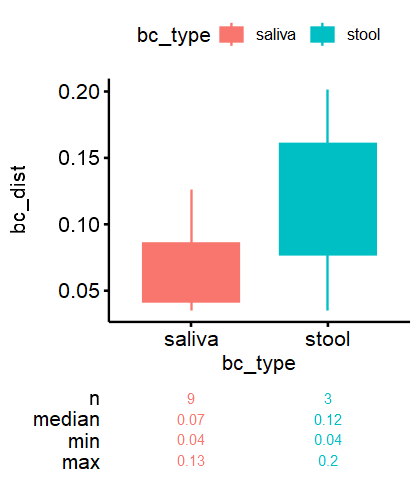

In [11]:
#Figure 3e
options(repr.plot.width = 3.5, repr.plot.height = 4)

p6 = read.csv("Figure3e_same_libray_difLanes_T20_comparisons.txt", sep = "\t")  %>%
    ggsummarystats(x = "bc_type", y = "bc_dist", fill = "bc_type", palette = "bc_type", digits = 2,
        color = "bc_type", summaries = c("n", "median", "min", "max"))

#pdf("Figure3g.pdf",width = 3.5,height = 4)
p6
#dev.off()
#p6

## Figure 3f

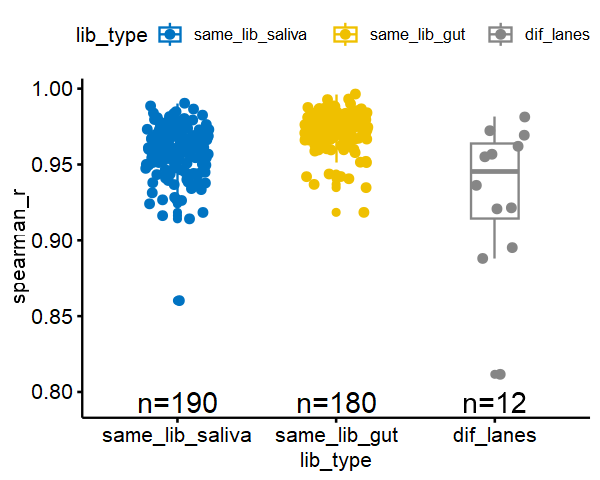

In [12]:
#Figure3f
options(repr.plot.width = 5, repr.plot.height = 4)

p7=read.csv("Figure3f_spearman_r.txt", sep = "\t") %>% 
ggstripchart(x="lib_type",y="spearman_r",
             add = "boxplot",              # Add boxplot overlay
             add.params = list(color = "lib_type", width = 0.3),  # Customize boxplot
             jitter = 0.2,                 # Spread points to avoid overlap
             size = 2,                     # Size of the points
             color = "lib_type",                # Color by group (cylinder count)
             palette = "jco")   + stat_n_text(size=6)

#pdf("Figure3h.pdf",width = 5,height = 4)
p7
#dev.off()

# Figure 4

## Figure 4a

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.


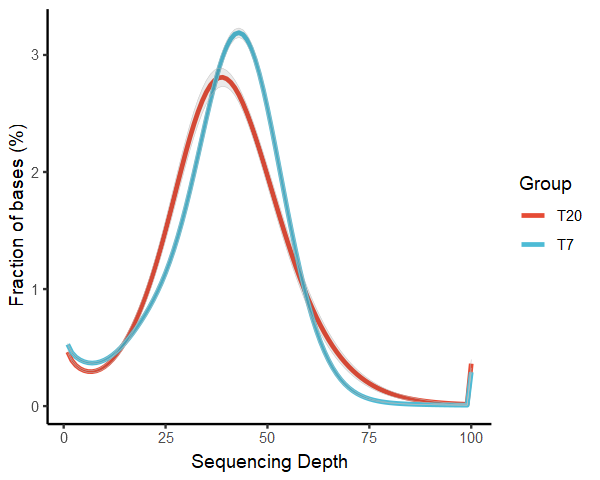

In [13]:
## WGS depth plot  Main Figure 4A
colors = pal_npg("nrc", alpha =1)(2)
ddata <- read.table("Figure4a_merge.wgs.depth.frequency.txt", header=T)
ddata$Frequency <- ddata$Frequency * 100
ddatasum <- ddata %>%
  group_by(Group, Depth) %>%
  summarise(Mean = mean(Frequency), SE = sd(Frequency) / sqrt(length(Frequency))) %>%
  ungroup()


#pdf(file="wgs.depth.frequency.pdf",height=4,width=8)
ggplot(data=ddatasum, aes(x=Depth,y=Mean,group=Group,color=Group)) + geom_line(linewidth=1) + geom_ribbon(aes(ymin = Mean - SE, ymax = Mean + SE), color="grey", linewidth=0.1, alpha=0.1) + scale_color_manual(values=colors) + ylab("Fraction of bases (%)") + xlab("Sequencing Depth")  + theme_classic() + theme(panel.grid = element_blank())
#dev.off()

## Figure 4b

Variable,T20.mean,T7.mean,T20.sd,T7.sd,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total_SNP,3.651198e+06,3.639257e+06,3.000342e+04,2.929168e+04,1.838877e-04
dbSNP_Rate,9.128960e+01,9.138347e+01,4.590632e-01,3.678700e-01,3.763100e-02
Novel_SNP,3.181386e+05,3.136322e+05,1.864427e+04,1.500702e+04,1.851895e-02
Novel_SNP_Rate,8.710400e+00,8.616533e+00,4.590632e-01,3.678700e-01,3.763100e-02
Ti.Tv,1.976533e+00,1.988667e+00,9.225894e-03,6.844476e-03,5.394054e-16
Total_InDel,8.279061e+05,7.889659e+05,1.821970e+04,1.650005e+04,8.357323e-22
dbInDel_Rate,3.828533e+01,3.879680e+01,3.587039e-01,3.529687e-01,6.007002e-13
Base_raw,1.313903e+11,1.275738e+11,2.129063e+10,7.787988e+09,1.393322e-01
Read_raw,8.759350e+08,8.504922e+08,1.419375e+08,5.191992e+07,1.393322e-01


Using id, group as id variables

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.


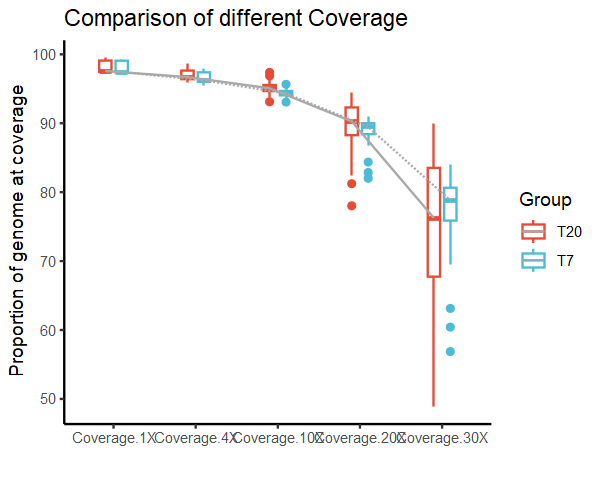

In [14]:
#qcdata <- read.table(file="merge.T20.T7.qc.stats.txt", header=T)
qcdata <- read.table(file="Figure4b_merge.T20.T7.qc.stats.txt2", header=T)
#snpdata <- read.table(file="merge.T20.T7.comparison.summary.txt", header=T, sep="\t")
qcdata$id <- str_split_fixed(qcdata$sample,"_",2)[,1]
qcdata$group <- str_split_fixed(qcdata$sample,"_",2)[,2]
rownames(qcdata) <- qcdata$sample
#confint(lm(Q30_raw ~ 1, qcdata[qcdata$group=="T20",]), level=0.95)
#confint(lm(Q30_1_raw ~ 1, qcdata[qcdata$group=="T20",]), level=0.95)
#confint(lm(Q30_2_raw ~ 1, qcdata[qcdata$group=="T20",]), level=0.95)
#Main Figure4B
qcdata$sample <- NULL
qcdata$Read_length <- NULL
Vars <- colnames(qcdata)
vdata <- as.data.frame(matrix(NA,nrow=38,ncol=6))
qcdata1 <- qcdata[qcdata$group=="T20",]
qcdata2 <- qcdata[qcdata$group=="T7",]
colnames(vdata) <- c("Variable","T20.mean","T7.mean","T20.sd","T7.sd","p.value")
for (i in 1:38){
  vdata[i,1] <- Vars[i]
  vdata[i,2] <- mean(qcdata1[,i])
  vdata[i,3] <- mean(qcdata2[,i])
  vdata[i,4] <- sd(qcdata1[,i])
  vdata[i,5] <- sd(qcdata2[,i])
  vdata[i,6] <- t.test(qcdata1[,i],qcdata2[,i],paired=T)$p.value
}
vdata
write.table(vdata,file="T20.vs.T7.qc.compare.txt", sep="\t", quote=F, col.names=T, row.names = F)
tdata1 <- qcdata[,c("id","group","Coverage.1X","Coverage.4X","Coverage.10X","Coverage.20X","Coverage.30X")]
ttdata1 <- melt(tdata1)
colnames(ttdata1) <- c("ID","Group","Coverage","Rate")
tdata1sum <- ttdata1 %>%
  group_by(Group,Coverage) %>%
  summarise(MedianRate = median(Rate)) %>%
  ungroup()
#pdf(file="T20.T7.Coverage.compare.pdf", height=4, width=8)
ggplot() + geom_boxplot(data=ttdata1, mapping=aes(x=as.factor(Coverage),y=Rate,color=Group), width=0.3,position=position_dodge(width=0.4)) + geom_line(data=tdata1sum, mapping=aes(x=as.factor(Coverage), y=MedianRate, group=Group, linetype=Group), position=position_dodge(width=0.4), linewidth=0.5, color="darkgrey") + ggtitle("Comparison of different Coverage") +  scale_color_manual(values=colors) + xlab("") + ylab("Proportion of genome at coverage") + theme_classic() 
#dev.off()

## Supplementary Figure6

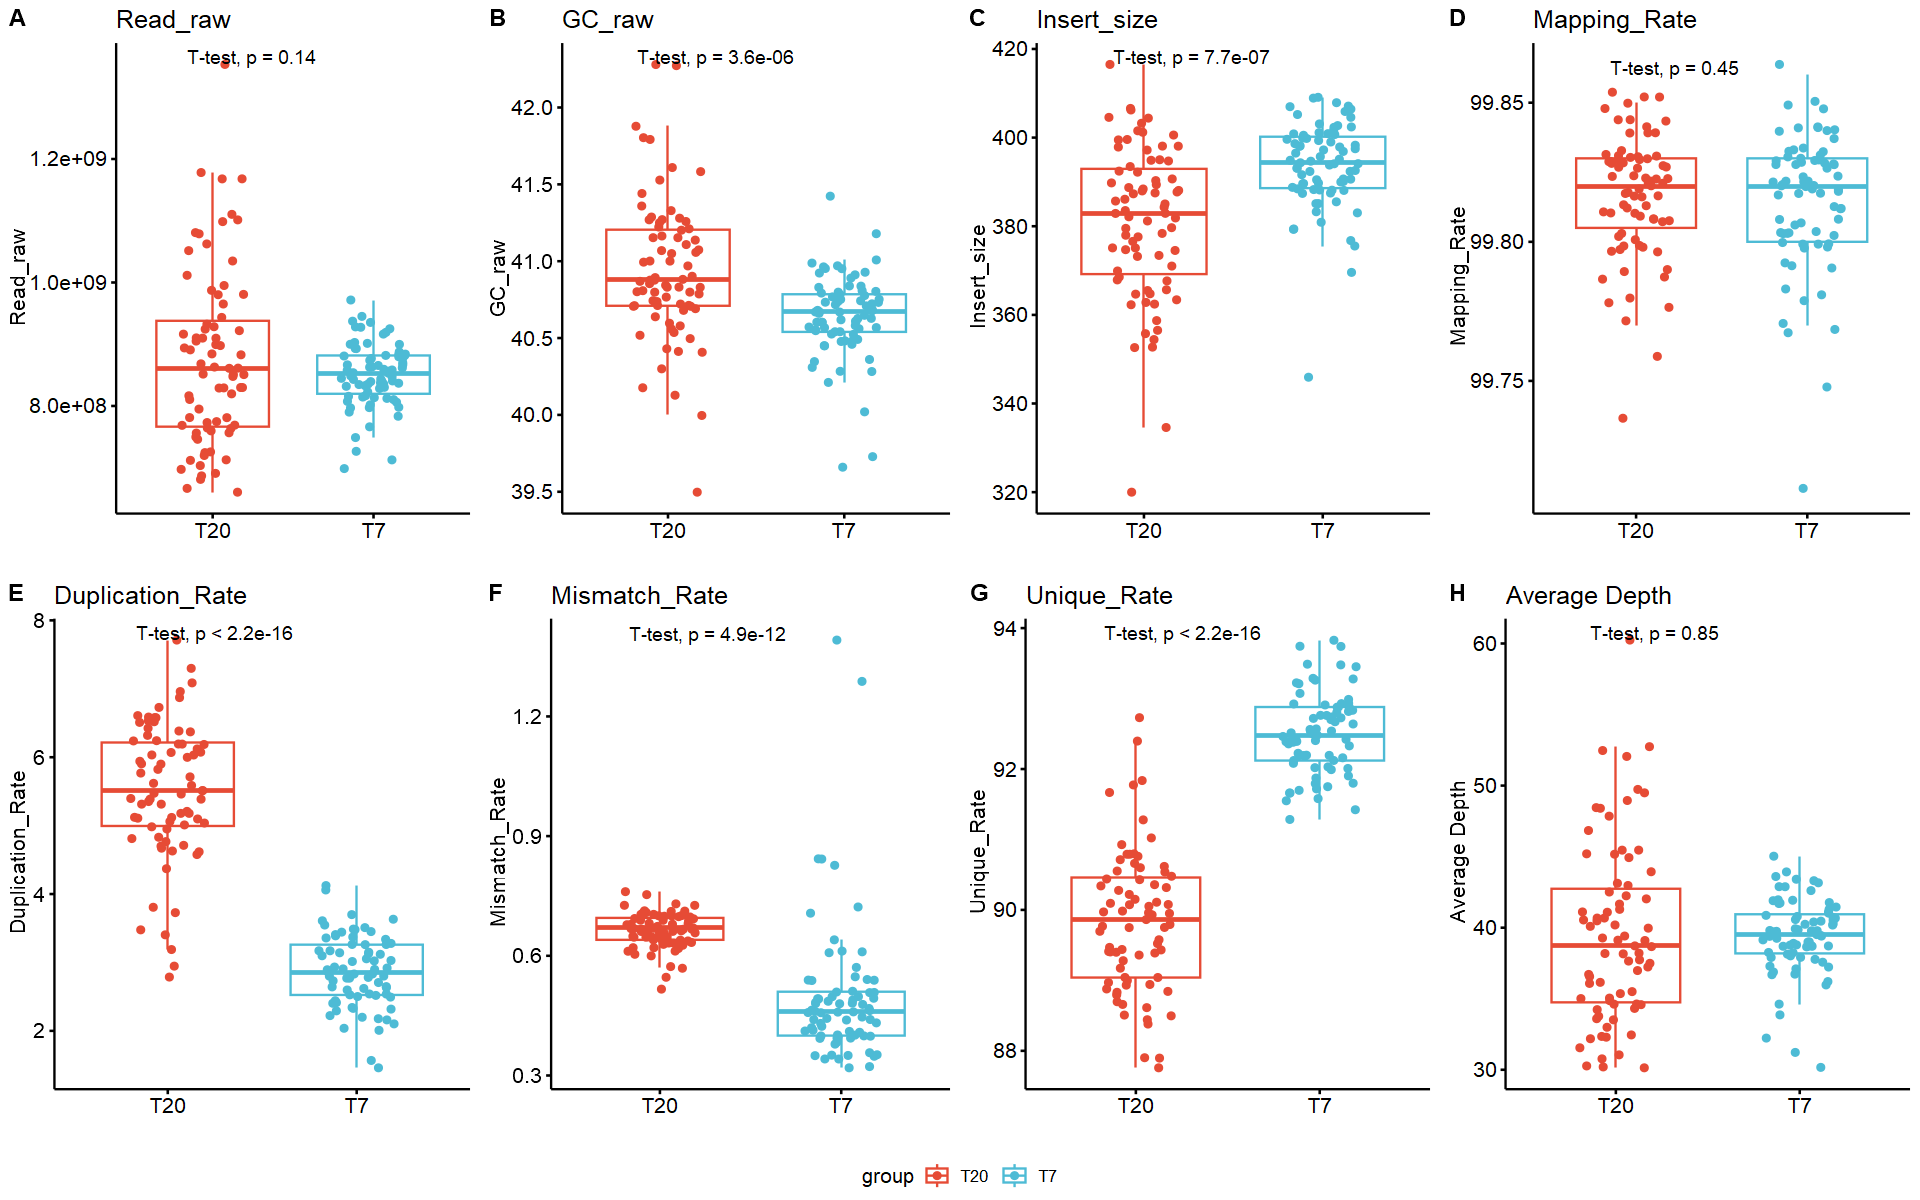

In [15]:
## Supplementary Figure6 A,B,C,D,E,F
p1 <- ggboxplot(qcdata, x = "group", y = "Read_raw",color = "group", palette =colors, add = "jitter",title="Read_raw", xlab="",ylab="Read_raw")
pp1<- p1 + stat_compare_means(method = "t.test",paired = TRUE)
p2 <- ggboxplot(qcdata, x = "group", y = "Rate_clean",color = "group", palette =colors, add = "jitter",title="Rate_clean", xlab="",ylab="Rate_clean")
pp2<- p2 + stat_compare_means(method = "t.test",paired = TRUE)
p3 <- ggboxplot(qcdata, x = "group", y = "GC_raw",color = "group", palette =colors, add = "jitter",title="GC_raw", xlab="",ylab="GC_raw")
pp3<- p3 + stat_compare_means(method = "t.test",paired = TRUE)

p5 <- ggboxplot(qcdata, x = "group", y = "Mapping_Rate",color = "group", palette =colors, add = "jitter",title="Mapping_Rate", xlab="",ylab="Mapping_Rate")
pp5<- p5 + stat_compare_means(method = "t.test",paired = TRUE)
p6 <- ggboxplot(qcdata, x = "group", y = "Duplication_Rate",color = "group", palette =colors, add = "jitter",title="Duplication_Rate", xlab="",ylab="Duplication_Rate")
pp6<- p6 + stat_compare_means(method = "t.test",paired = TRUE)
p7 <- ggboxplot(qcdata, x = "group", y = "Mismatch_Rate",color = "group", palette =colors, add = "jitter",title="Mismatch_Rate", xlab="",ylab="Mismatch_Rate")
pp7 <- p7 + stat_compare_means(method = "t.test",paired = TRUE)
p8 <- ggboxplot(qcdata, x = "group", y = "Unique_Rate",color = "group", palette =colors, add = "jitter",title="Unique_Rate", xlab="",ylab="Unique_Rate")
pp8 <- p8 + stat_compare_means(method = "t.test",paired = TRUE)
p9 <- ggboxplot(qcdata, x = "group", y = "Average_depthrmdup",color = "group", palette =colors, add = "jitter",title="Average Depth", xlab="",ylab="Average Depth")
pp9 <- p9 + stat_compare_means(method = "t.test",paired = TRUE)

p<- ggboxplot(qcdata, x = "group", y = "Coverage.30X",color = "group", palette =colors, add = "jitter",title="Coverage.30X", xlab="",ylab="Coverage.30X")
#p + stat_compare_means(method = "t.test",paired = TRUE)

p10 <- ggboxplot(qcdata, x = "group", y = "dbSNP_Rate",color = "group", palette =colors, add = "jitter",title="dbSNP_Rate", xlab="",ylab="dbSNP_Rate")
pp10<- p10 + stat_compare_means(method = "t.test",paired = TRUE)

p11 <- ggboxplot(qcdata, x = "group", y = "dbInDel_Rate",color = "group", palette =colors, add = "jitter",title="dbInDel_Rate", xlab="",ylab="dbInDel_Rate")
pp11<- p11 + stat_compare_means(method = "t.test",paired = TRUE)

p12 <- ggboxplot(qcdata, x = "group", y = "Ti.Tv",color = "group", palette =colors, add = "jitter",title="Ti/Tv", xlab="",ylab="Ti/Tv")
pp12<- p12 + stat_compare_means(method = "t.test",paired = TRUE)

p4 <- ggboxplot(qcdata, x = "group", y = "Insert_size",color = "group", palette =colors, add = "jitter",title="Insert_size", xlab="",ylab="Insert_size")
pp4<- p4 + stat_compare_means(method = "t.test",paired = TRUE)

ppp <- ggarrange(pp1,pp2,pp3,pp4,pp5,pp6,pp7,pp8,pp9,pp10,pp11,pp12,ncol=4,nrow=3,common.legend=T,legend="bottom",labels=c("A","B","C","D","E","F","G","H","I","J","K","L"))
ppp2 <- ggarrange(pp1,pp3,pp4,pp5,pp6,pp7,pp8,pp9,ncol=4,nrow=2,common.legend=T,legend="bottom",labels=c("A","B","C","D","E","F","G","H"))
#pdf(file="WGS.T7_vs_T20.qc.compare.pdf",height=10,width=12)
#ppp
#dev.off()
#pdf(file="supplementary_figure2.pdf",height=10,width=16)
options(repr.plot.width = 16, repr.plot.height = 10)


ppp2
#dev.off()

## Supplementary Figure7

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.


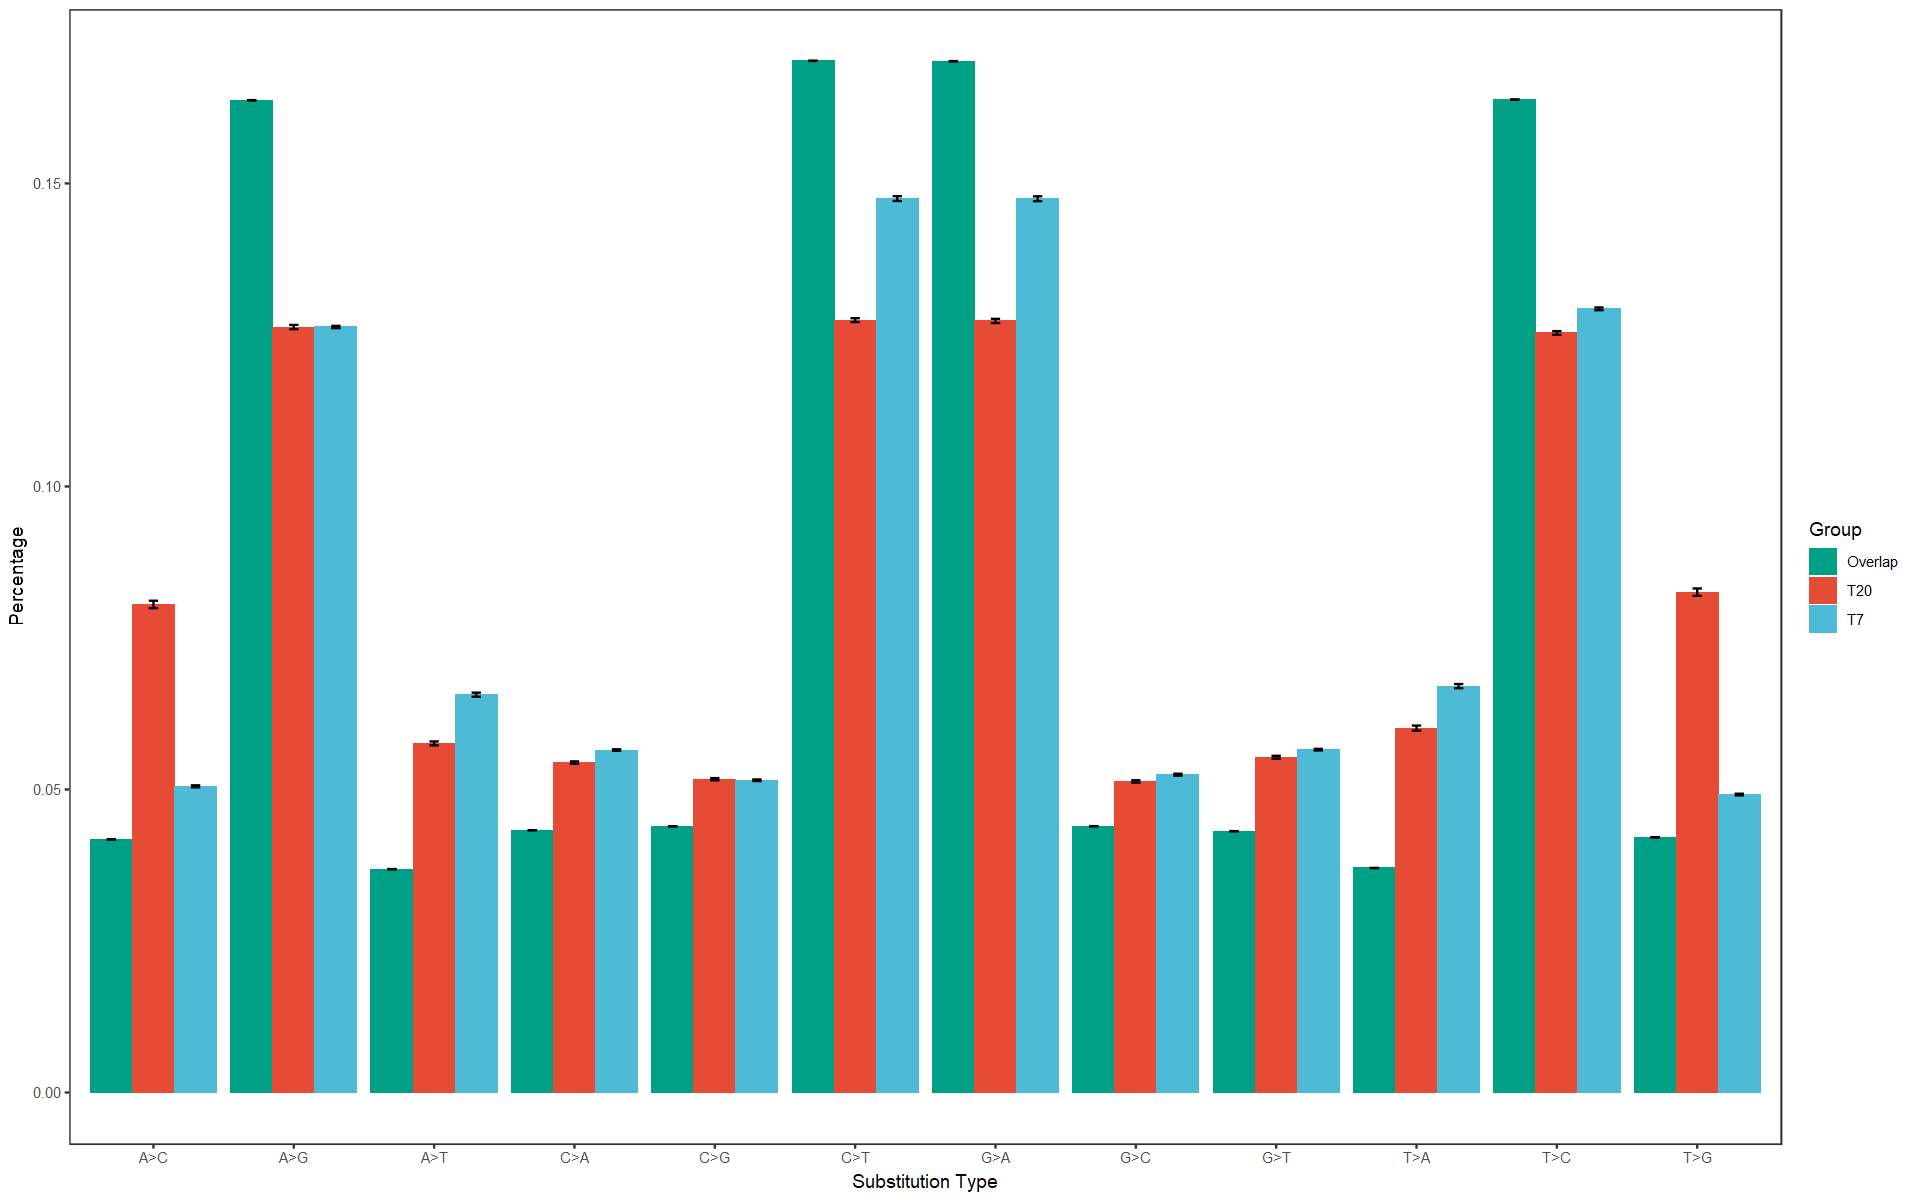

In [16]:
## Supplementary Figure7

color3 = c("#00A087FF","#E64B35FF","#4DBBD5FF")

sdata <- read.table("Supplementary_Figure7_merge.T20.T7.substitution.type.txt",header=T)
sdatasum <- sdata %>%
  group_by(Group, Type) %>%
  summarise(Mean = mean(Fre), SE = sd(Fre)/sqrt(length(Fre))) %>%
  ungroup()

#ggplot(sdatasum, aes(x = Type, y = Mean)) +  geom_col(aes(color = Group, fill = Group), position = position_dodge(0.9), width = 0.7) + geom_errorbar( aes(x=Type, ymin=Mean-SE, ymax=Mean+SE), size=0.3)  + scale_color_manual(values = color3) +  scale_fill_manual(values = color3) + theme_bw() + theme( panel.grid = element_blank()) + xlab("Substitution Type") + ylab("Percentage") 


#ggplot() + geom_boxplot(data=sdata, mapping=aes(x=as.factor(Type),y=Fre,color=Group), width=0.7,position=position_dodge(width=0.9), linewidth=0.5) + ggtitle("") +  scale_color_manual(values=color3) + xlab("Substitution Type") + ylab("Percentage") + theme_classic() 
#pdf(file="T20.T7.substitution.type.pdf",height=5,width=10)
ggplot(sdatasum, aes(x=Type, y=Mean, fill=Group)) + geom_bar( position=position_dodge(), stat="identity") + 
geom_errorbar(aes(ymin=Mean-SE, ymax=Mean+SE), width=.2,  position=position_dodge(.9))  + 
scale_color_manual(values = color3) +  scale_fill_manual(values = color3) + theme_bw() + 
theme( panel.grid = element_blank()) + xlab("Substitution Type") + ylab("Percentage") 
#dev.off()

## Supplementary Figure8

`summarise()` has grouped output by 'Group'. You can override using the `.groups` argument.


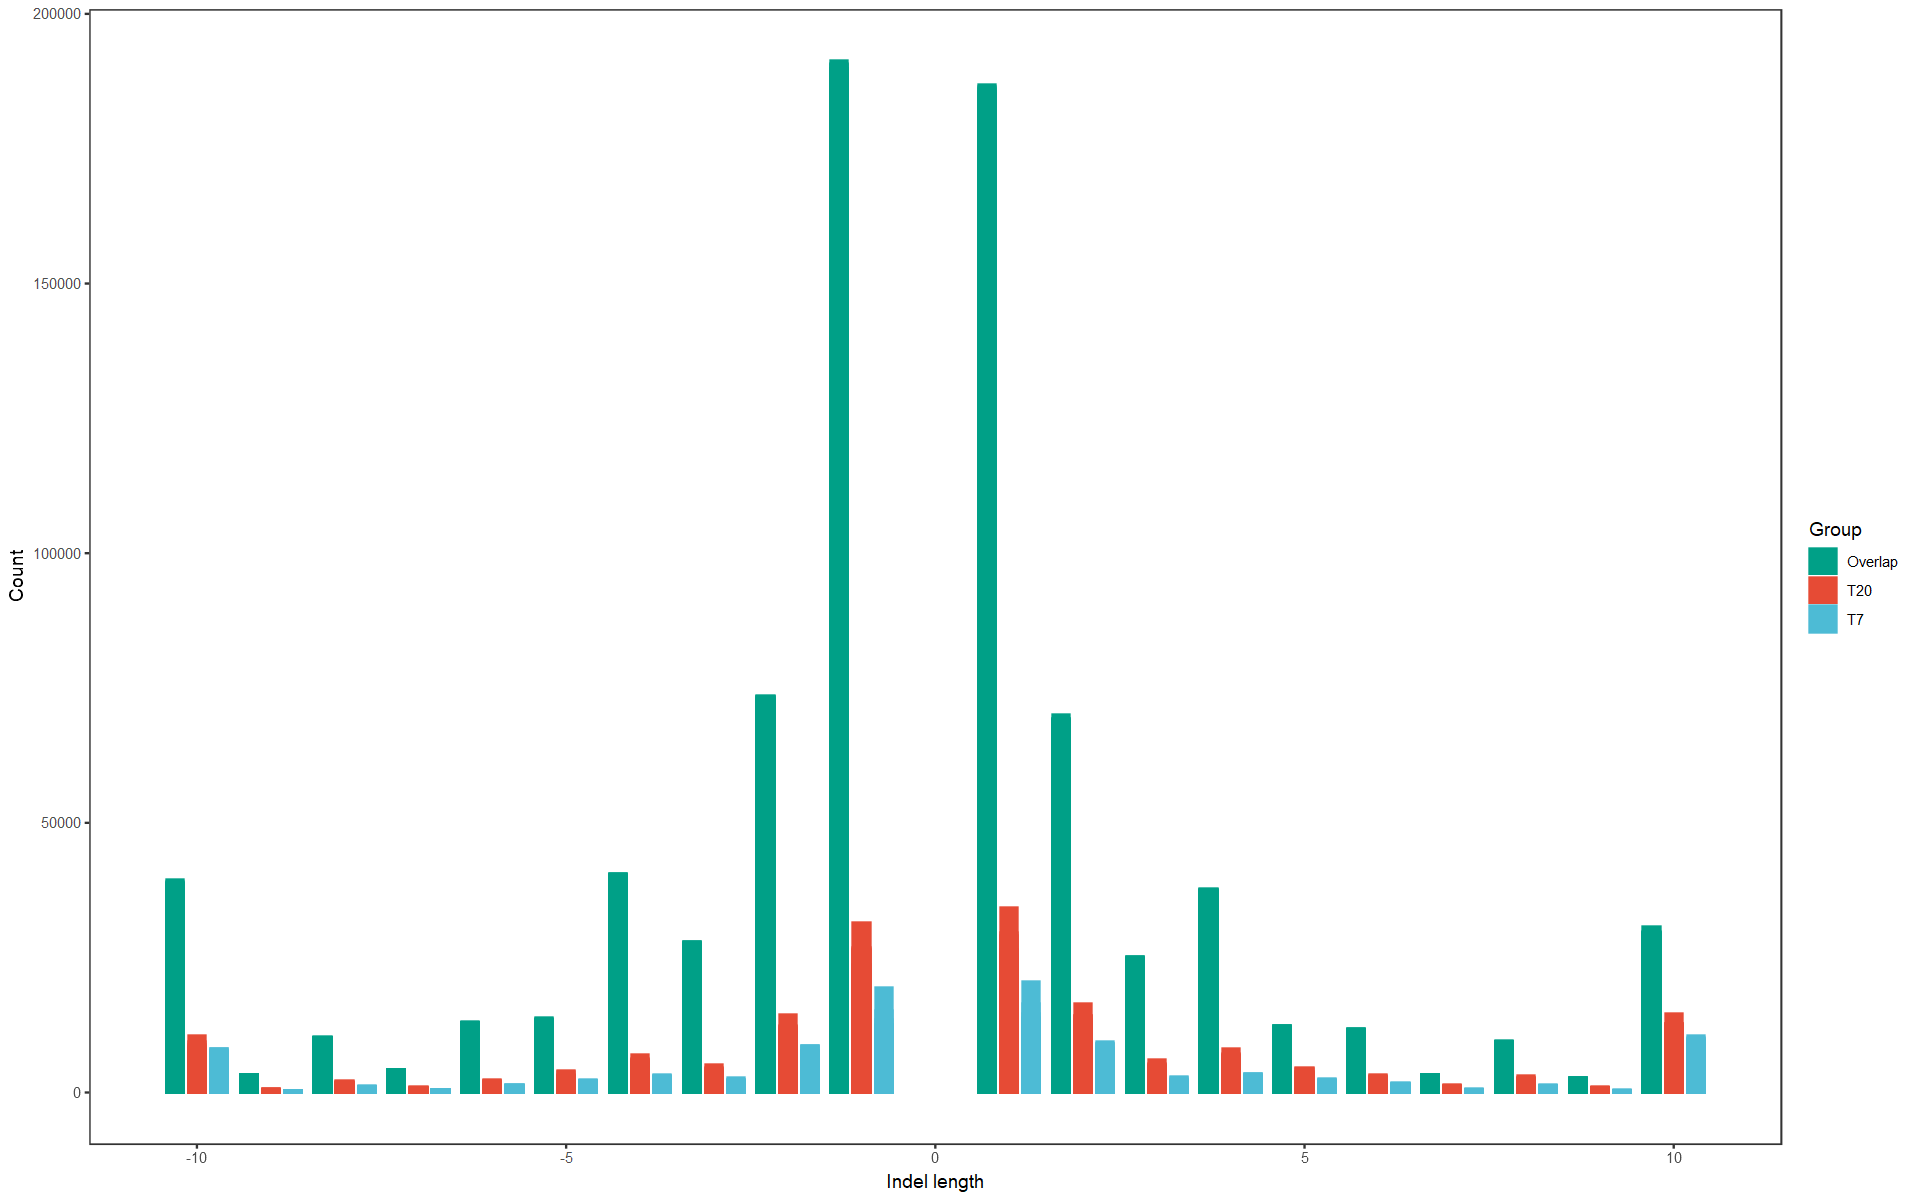

In [17]:
#intersection
#Indel Distribution 
#Supplementary Figure8
color3 = c("#00A087FF","#E64B35FF","#4DBBD5FF")
idata <- read.table("Supplementary_Figure8_merge.T20.T7.Indel.length.distribution.txt",header=T)
idatasum <- idata %>%
  group_by(Group, Length) %>%
  summarise(Mean = mean(Count), SE = sd(Count)/sqrt(length(Count))) %>%
  ungroup()
idata1 <- idatasum[idatasum$Group=="T7",]
idata2 <- idatasum[idatasum$Group=="T20",]
idata3 <- idatasum[idatasum$Group=="Overlap",]
idata1$fre <- idata1$Mean / sum(idata1$Mean)
idata2$fre <- idata2$Mean / sum(idata2$Mean)
idata3$fre <- idata3$Mean / sum(idata3$Mean)
fre1 <- 0.142 + 0.156
fre2 <- 0.166 + 0.186 
fre3 <- 0.239 + 0.233
#pdf(file="T20.T7.Indel.length.distribution.pdf",height=5,width=10)
ggplot(idata, aes(x = Length, y = Count)) +  geom_col(aes(color = Group, fill = Group), position = position_dodge(0.9), width = 0.7) + scale_color_manual(values = color3) +  scale_fill_manual(values = color3) + theme_bw() + theme( panel.grid = element_blank()) + xlab("Indel length") + ylab("Count") 
#dev.off()

## Figure 4c,d

`summarise()` has grouped output by 'Chr'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Chr'. You can override using the `.groups` argument.


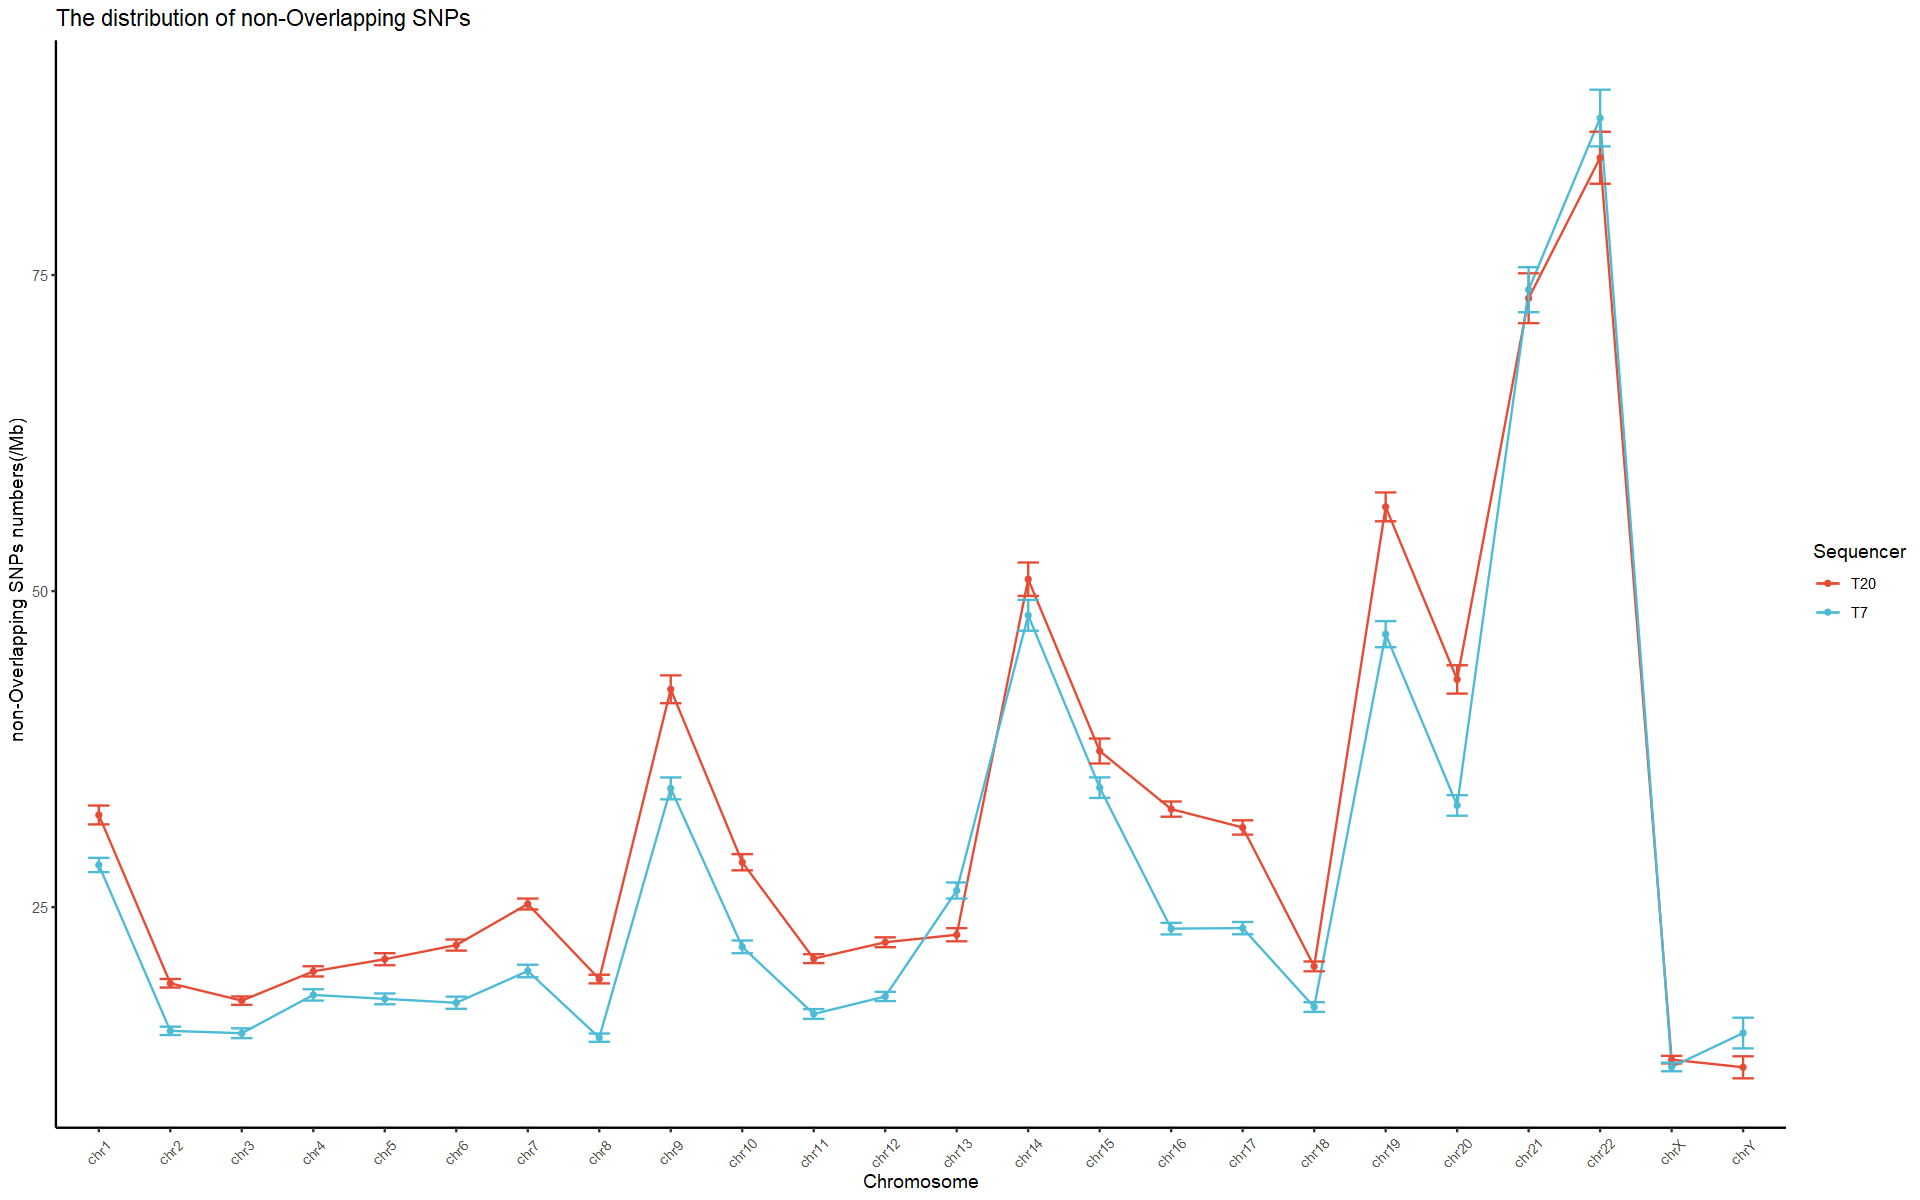

In [18]:
#Figure 4c
ssdata <- read.table("Figure4cd_T20.T7.nonOverlap.snp.dis.txt2", header=T, sep="\t")

sdatasum1 <- ssdata %>%
  group_by(Chr, Sequencer) %>%
  summarise(Mean = mean(SNPs), SE = sd(SNPs)/sqrt(length(SNPs))) %>%
  ungroup()

sdatasum2 <- ssdata %>%
  group_by(Chr, Sequencer) %>%
  summarise(Mean = mean(Indels), SE = sd(Indels)/sqrt(length(Indels))) %>%
  ungroup()
Chrs <- paste("chr",c(seq(1,22),"X","Y"),sep="")
sdatasum1$Chr <- factor(sdatasum1$Chr, levels=Chrs)
sdatasum2$Chr <- factor(sdatasum2$Chr, levels=Chrs)

#pdf(file="T20.T7.non-Overlapping.SNPs.distribution.pdf", height=4, width=8)
ggplot(sdatasum1, aes(x=Chr,y=Mean,colour=Sequencer,group=Sequencer)) + geom_line(linewidth=0.5) + geom_point(size=1) + geom_errorbar(aes(ymin=Mean-SE, ymax=Mean+SE), width=0.3) + ggtitle("The distribution of non-Overlapping SNPs") +  scale_color_manual(values=colors) + xlab("Chromosome") + ylab("non-Overlapping SNPs numbers(/Mb)")  + theme_classic() + theme(panel.grid = element_blank(), axis.text.x =element_text(angle =45,hjust =0.5,vjust = 0.5, size=8))
#dev.off()


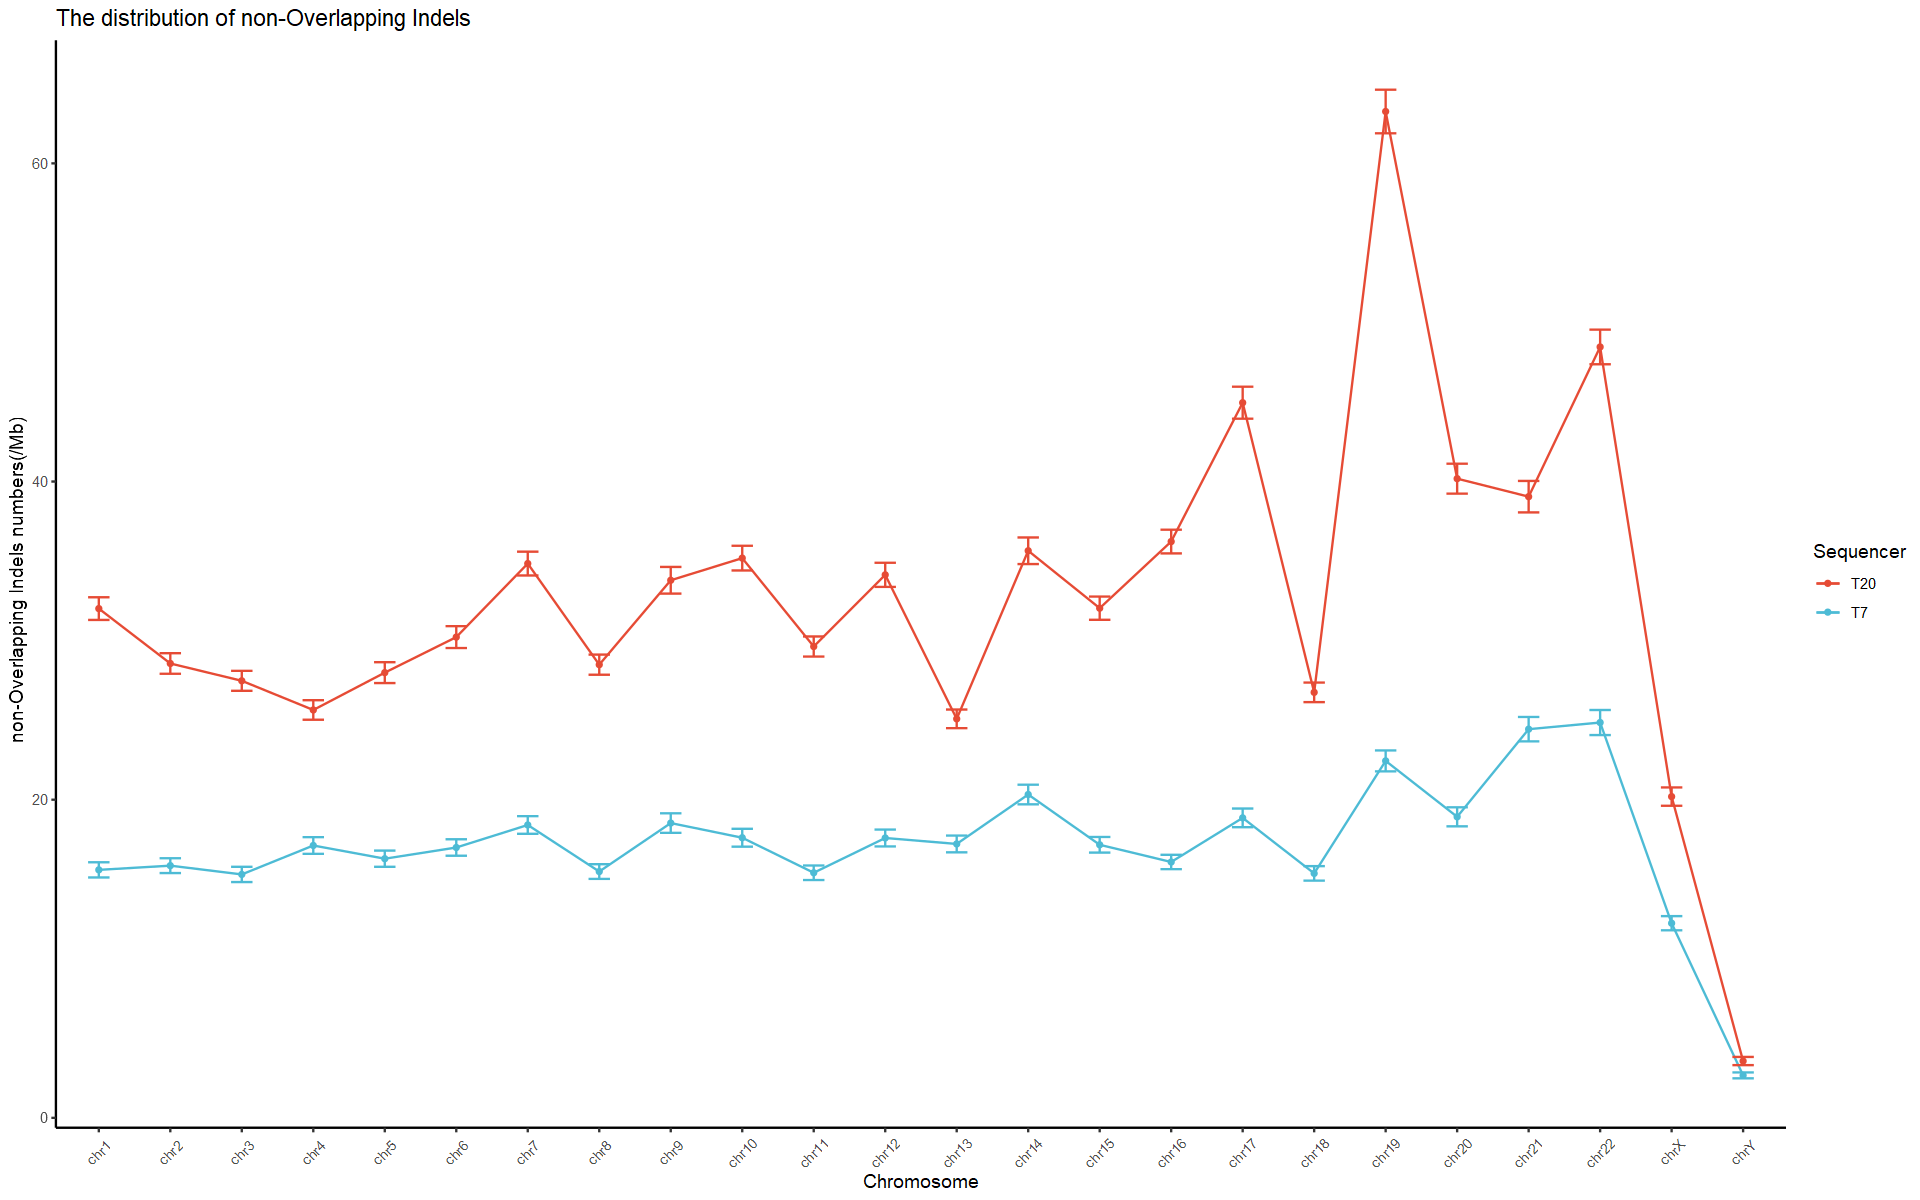

In [36]:
#pdf(file="T20.T7.non-Overlapping.Indels.distribution.pdf", height=4, width=8)

#Figure 4d

ggplot(sdatasum2, aes(x=Chr,y=Mean,colour=Sequencer,group=Sequencer)) + geom_line(linewidth=0.5) + geom_point(size=1) + geom_errorbar(aes(ymin=Mean-SE, ymax=Mean+SE), width=0.3) + ggtitle("The distribution of non-Overlapping Indels") +  scale_color_manual(values=colors) + xlab("Chromosome") + ylab("non-Overlapping Indels numbers(/Mb)")  + theme_classic() +theme(panel.grid = element_blank(), axis.text.x =element_text(angle =45,hjust =0.5,vjust = 0.5, size=8))

#dev.off()

# Figure 5

In [19]:
sdata <- read.table(file="Figure5_NA12878.QC.txt",sep="\t",header=T)
sdata$Run <- factor(sdata$Run, levels = c("T7", "RUN10", "RUN11", "RUN12","RUN13","RUN14","RUN15","RUN17", "RUN18", "RUN20", "RUN21","RUN22","RUN23", "RUN24", "RUN25","RUN26","RUN27", "RUN28","RUN29","RUN30", "RUN31", "RUN32"))

## Figure 5a

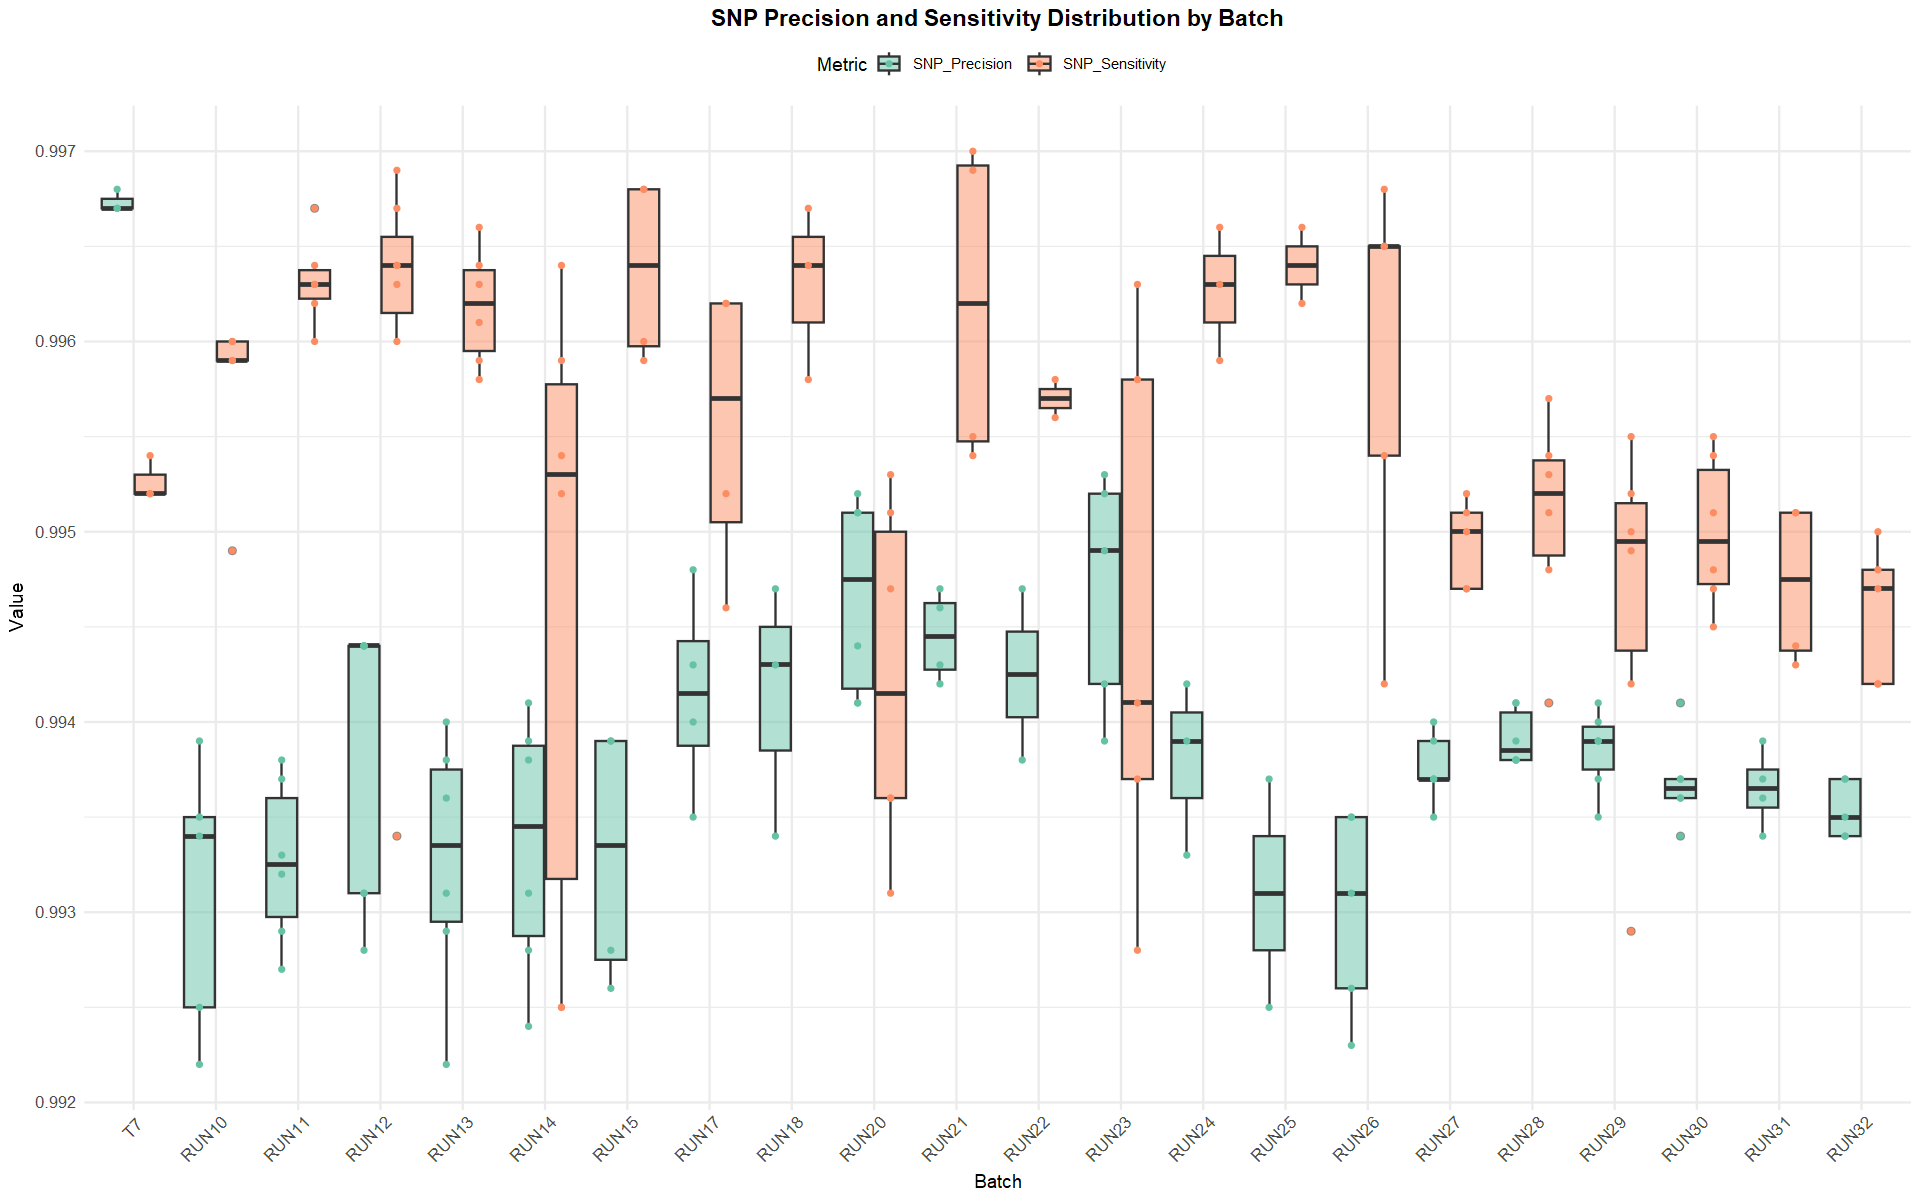

In [20]:
#pdf(file="NA12878_qc.pdf",height=6,width=10)

long_data <- tidyr::pivot_longer(sdata, cols = c(SNP_Precision, SNP_Sensitivity), 
                                names_to = "Metric", values_to = "Value")
ggplot(long_data, aes(x = Run, y = Value)) +
  geom_boxplot(aes(fill = Metric), position = position_dodge(width = 0.8), alpha = 0.5) +
  geom_point(aes(color = Metric, group = Metric), 
             position = position_dodge(width = 0.8), size = 1) +
  scale_fill_manual(values = c("SNP_Precision" = "#66C2A5", "SNP_Sensitivity" = "#FC8D62")) +
  scale_color_manual(values = c("SNP_Precision" = "#66C2A5", "SNP_Sensitivity" = "#FC8D62")) +
  labs(title = "SNP Precision and Sensitivity Distribution by Batch", 
       y = "Value", x = "Batch") +
  theme_minimal() +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        axis.text = element_text(size = 10), axis.text.x = element_text(angle = 45, hjust = 1),
        legend.box = "vertical") +
  guides(
    fill = guide_legend(title = "Metric"),
    color = guide_legend(title = "Metric"),
  )

## Figure 5b

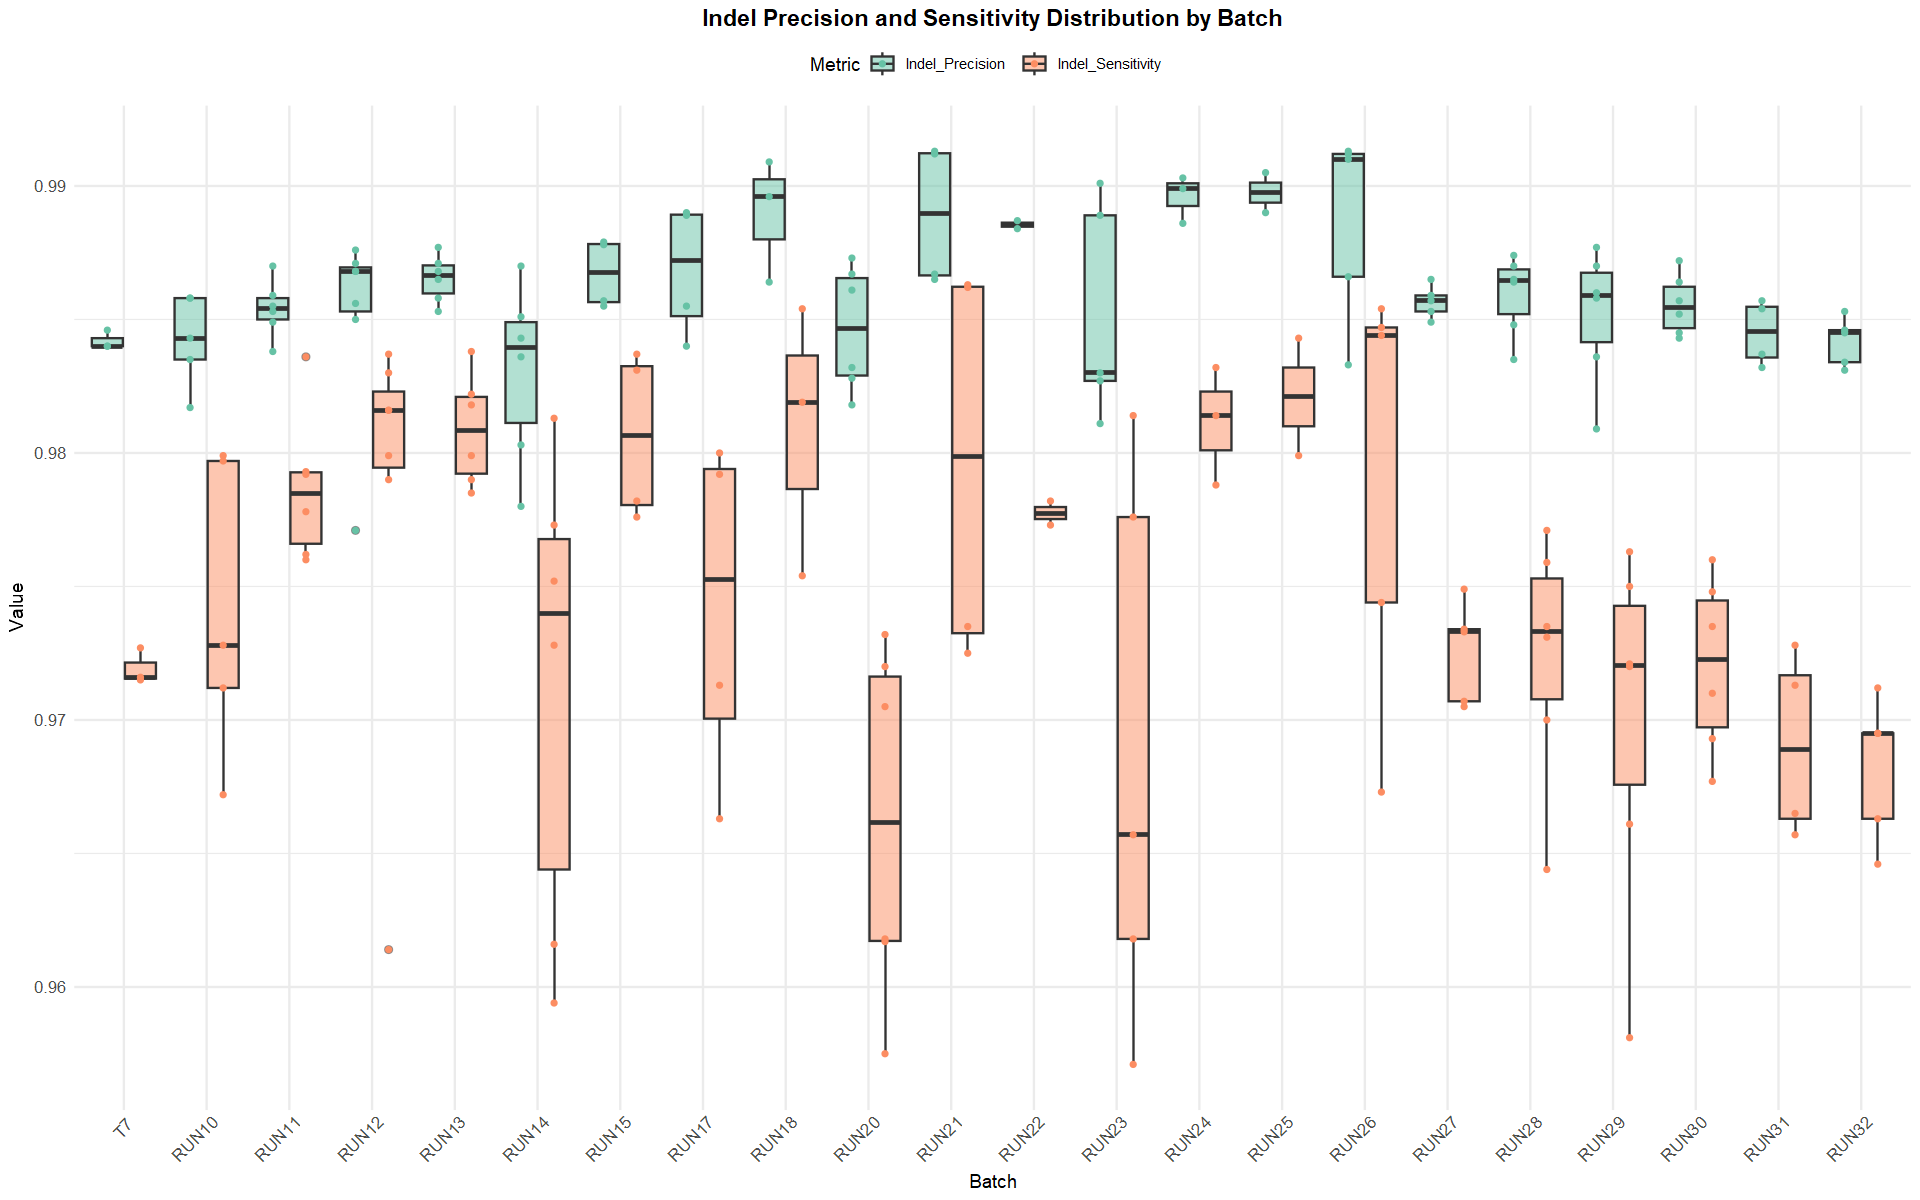

In [21]:
long_data <- tidyr::pivot_longer(sdata, cols = c(Indel_Precision, Indel_Sensitivity), 
                                names_to = "Metric", values_to = "Value")
ggplot(long_data, aes(x = Run, y = Value)) +
  geom_boxplot(aes(fill = Metric), position = position_dodge(width = 0.8), alpha = 0.5) +
  geom_point(aes(color = Metric, group = Metric), 
             position = position_dodge(width = 0.8), size = 1) +
  scale_fill_manual(values = c("Indel_Precision" = "#66C2A5", "Indel_Sensitivity" = "#FC8D62")) +
  scale_color_manual(values = c("Indel_Precision" = "#66C2A5", "Indel_Sensitivity" = "#FC8D62")) +
  labs(title = "Indel Precision and Sensitivity Distribution by Batch", 
       y = "Value", x = "Batch") +
  theme_minimal() +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        axis.text = element_text(size = 10), axis.text.x = element_text(angle = 45, hjust = 1),
        legend.box = "vertical") +
  guides(
    fill = guide_legend(title = "Metric"),
    color = guide_legend(title = "Metric"),
  )



## Figure 5c

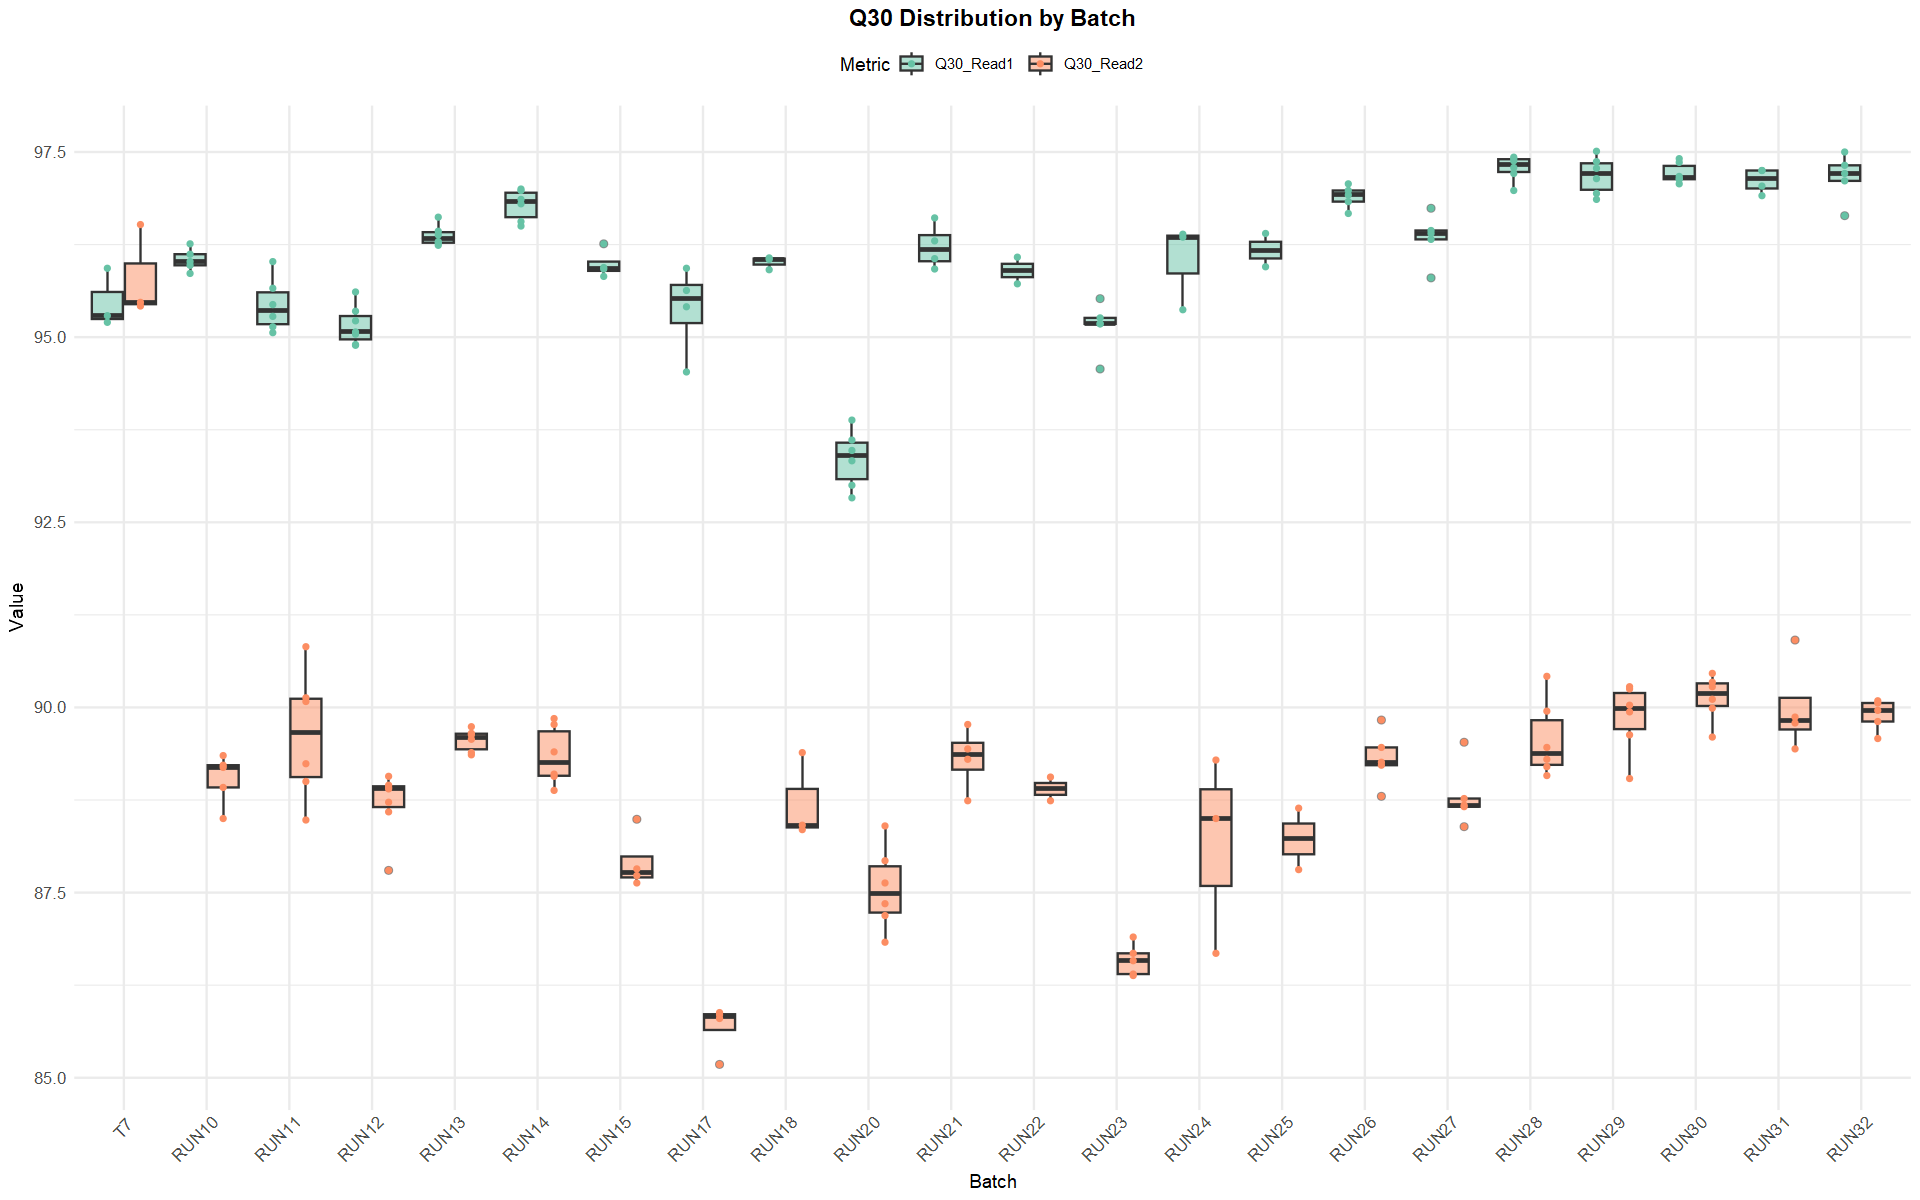

In [22]:
long_data <- tidyr::pivot_longer(sdata, cols = c(Q30_Read1, Q30_Read2), 
                                names_to = "Metric", values_to = "Value")
ggplot(long_data, aes(x = Run, y = Value)) +
  geom_boxplot(aes(fill = Metric), position = position_dodge(width = 0.8), alpha = 0.5) +
  geom_point(aes(color = Metric, group = Metric), 
             position = position_dodge(width = 0.8), size = 1) +
  scale_fill_manual(values = c("Q30_Read1" = "#66C2A5", "Q30_Read2" = "#FC8D62")) +
  scale_color_manual(values = c("Q30_Read1" = "#66C2A5", "Q30_Read2" = "#FC8D62")) +
  labs(title = "Q30 Distribution by Batch", 
       y = "Value", x = "Batch") +
  theme_minimal() +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        axis.text = element_text(size = 10), axis.text.x = element_text(angle = 45, hjust = 1),
        legend.box = "vertical") +
  guides(
    fill = guide_legend(title = "Metric"),
    color = guide_legend(title = "Metric"),
  )



## Figure 5d

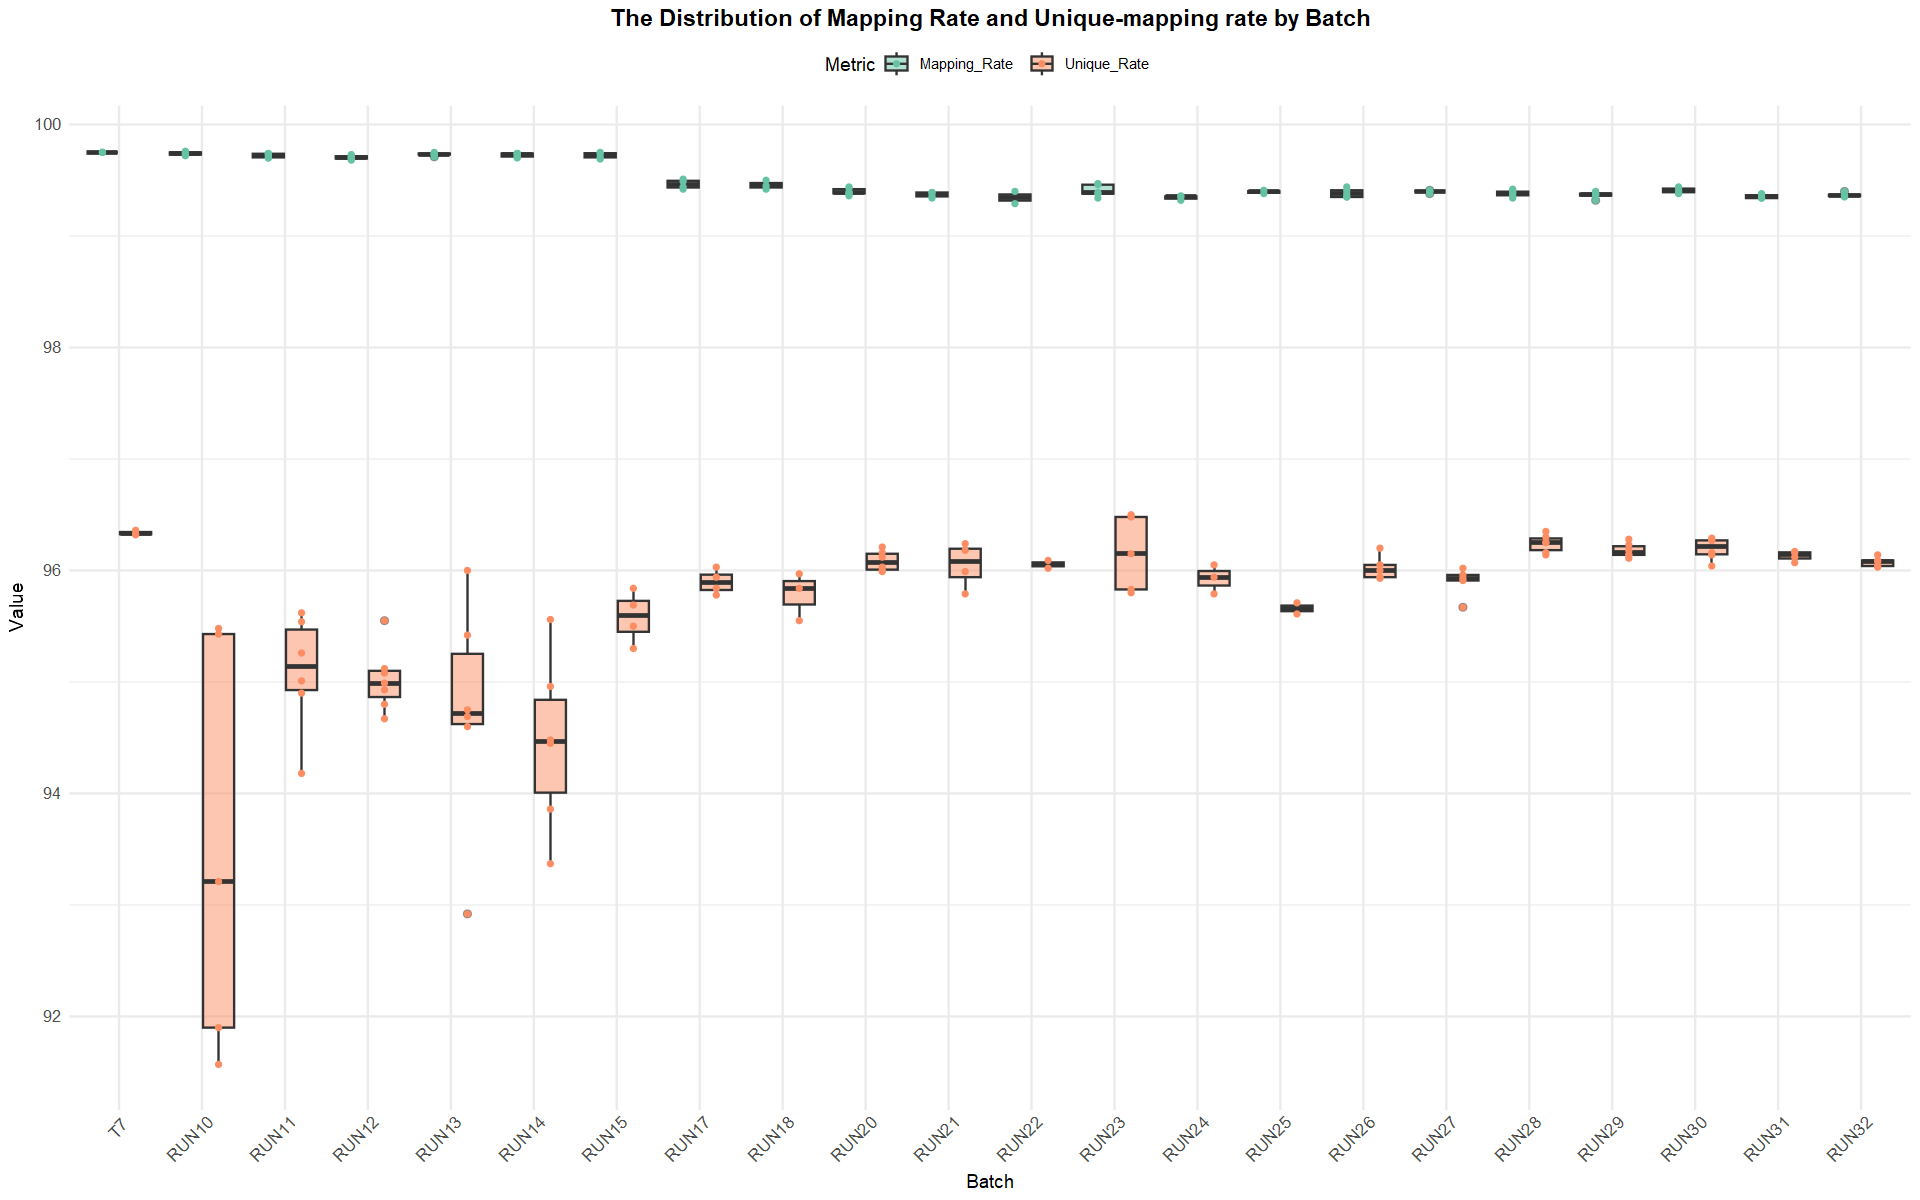

In [23]:
long_data <- tidyr::pivot_longer(sdata, cols = c(Mapping_Rate, Unique_Rate), 
                                names_to = "Metric", values_to = "Value")
ggplot(long_data, aes(x = Run, y = Value)) +
  geom_boxplot(aes(fill = Metric), position = position_dodge(width = 0.8), alpha = 0.5) +
  geom_point(aes(color = Metric, group = Metric), 
             position = position_dodge(width = 0.8), size = 1) +
  scale_fill_manual(values = c("Mapping_Rate" = "#66C2A5", "Unique_Rate" = "#FC8D62")) +
  scale_color_manual(values = c("Mapping_Rate" = "#66C2A5", "Unique_Rate" = "#FC8D62")) +
  labs(title = "The Distribution of Mapping Rate and Unique-mapping rate by Batch", 
       y = "Value", x = "Batch") +
  theme_minimal() +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        axis.text = element_text(size = 10), axis.text.x = element_text(angle = 45, hjust = 1),
        legend.box = "vertical") +
  guides(
    fill = guide_legend(title = "Metric"),
    color = guide_legend(title = "Metric"),
  )

#dev.off()

# Supplementary Figure4

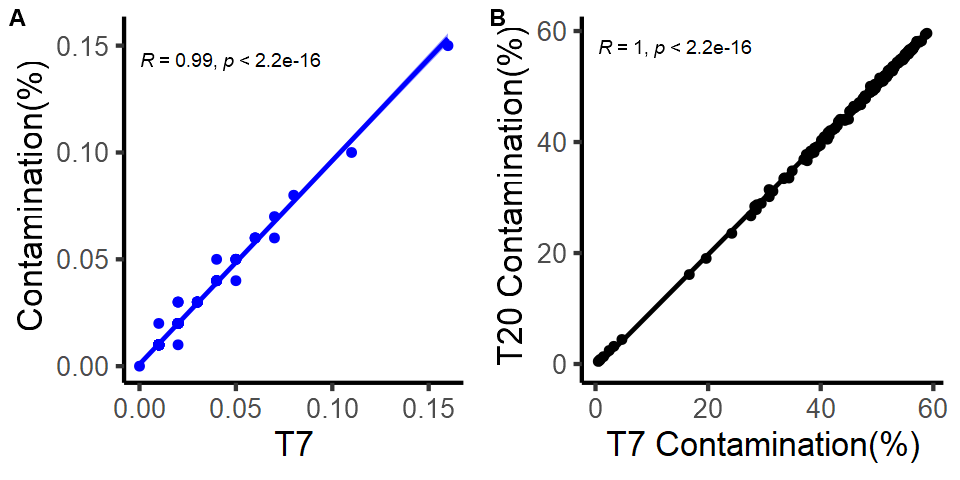

In [24]:
options(repr.plot.width = 8, repr.plot.height = 4)

p1 = read.csv("Figure3ac_human_Reads_contamination.txt", sep = "\t", row.names = "X") %>% filter(body == "gut") %>%
    ggscatter(x = "T7", y = "T20", color = "blue", conf.int = TRUE, cor.coef = TRUE,
        add = "reg.line") + theme_classic(base_size = 20) + ylab("Contamination(%)")

p2 = read.csv("Figure3ac_human_Reads_contamination.txt", sep = "\t", row.names = "X") %>%
    filter(body == "oral") %>%
    ggscatter(x = "T7", y = "T20", conf.int = TRUE, cor.coef = TRUE, add = "reg.line") +
    theme_classic(base_size = 20) + ylab("T20 Contamination(%)") + xlab("T7 Contamination(%)")

ggarrange(p1, p2, labels = c("A", "B"))

#p1 | p2

#ggsave("Figure2a.pdf",width = 8,height = 4)

# Supplementary Figure5

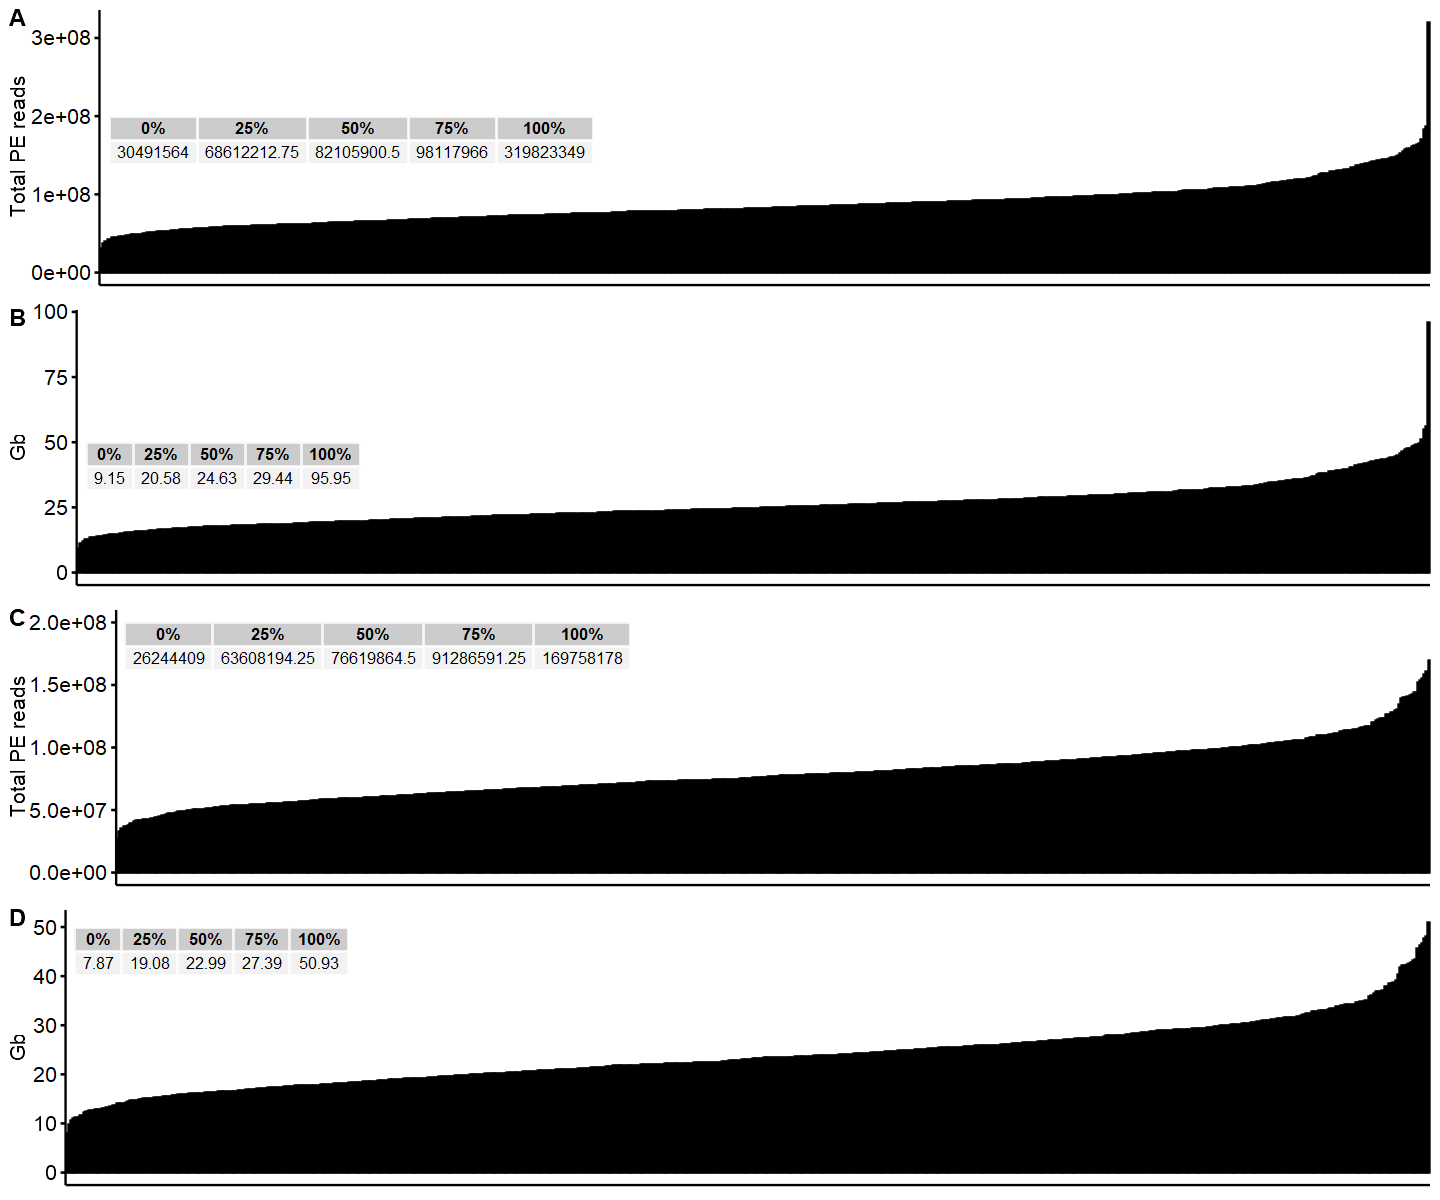

In [30]:
options(repr.plot.width = 12, repr.plot.height = 10)

tmp = data.frame(quantile(read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>% filter(lane == "FP400002035") %>% pull(total_reads)))
colnames(tmp) = c("total_reads")
tmp = as.tibble(t(tmp))
                
p1 = read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>% filter(lane == "FP400002035") %>% ggbarplot(x="sent_ID",y="total_reads") + 
annotate(geom = "table", x = 4.5, y = 2e+08, label = list(tmp), 
           vjust = 1, hjust = 0) +  theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
ylab("Total PE reads")


tmp = data.frame(quantile(read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>%  filter(lane == "FP400002035") %>% pull(data_size)))
colnames(tmp) = c("data_size")
tmp = as.tibble(t(round(tmp,2)))
                
p2 = read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>% filter(lane == "FP400002035") %>% ggbarplot(x="sent_ID",y="data_size") + 
annotate(geom = "table", x = 4.5, y = 50, label = list(tmp), 
           vjust = 1, hjust = 0) +  theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank()) +
ylab("Gb")

#ggarrange(p1,p2,nrow=2,labels = c("A","B"))

#ggsave(width = 12,height = 8,"SupplementaryFigure3_bak.pdf")

tmp = data.frame(quantile(read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>% filter(lane == "FP400002038") %>% pull(total_reads)))
colnames(tmp) = c("total_reads")
tmp = as.tibble(t(tmp))
                
p3 = read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>% filter(lane == "FP400002038") %>% ggbarplot(x="sent_ID",y="total_reads") + 
annotate(geom = "table", x = 4.5, y = 2e+08, label = list(tmp), 
           vjust = 1, hjust = 0) +  theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank()) + 
ylab("Total PE reads")


tmp = data.frame(quantile(read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>%  filter(lane == "FP400002038") %>% pull(data_size)))
colnames(tmp) = c("data_size")
tmp = as.tibble(t(round(tmp,2)))
                
p4 = read.csv("Supplementary_Figure5_barcode960.txt",sep="\t") %>% filter(lane == "FP400002038") %>% ggbarplot(x="sent_ID",y="data_size") + 
annotate(geom = "table", x = 4.5, y = 50, label = list(tmp), 
           vjust = 1, hjust = 0) +  theme(axis.title.x=element_blank(),axis.text.x=element_blank(),axis.ticks.x=element_blank()) +
ylab("Gb")

ggarrange(p1,p2,p3,p4,nrow=4,labels = c("A","B","C","D"))

#ggsave(width = 12,height = 8,"SupplementaryFigure4.pdf")
